<a href="https://colab.research.google.com/github/MarkNoble-1/skills-introduction-to-github/blob/main/INN_Project_SLC_DSBA_INNHotels_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
!apt-get install texlive-xetex
!apt-get install pandoc
%cd /content/drive/My Drive/Data Science and Business Analytics/Supervised Learning - Classification
!jupyter nbconvert INN_Project_SLC_DSBA_INNHotels_FullCode.ipynb --to pdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-ja

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To perform statistical analysis
import scipy.stats as stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

## Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
inn = pd.read_csv('/content/drive/My Drive/Data Science and Business Analytics/Supervised Learning - Classification/INNHotelsGroup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

### First and Last 5 rows of the dataset and shape of the dataset

In [ ]:
inn.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
inn.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
inn.shape

(36275, 19)

Observations:

- Upon first impression data looks as expected
- There are 36275 rows and 19 columns

###Data Types and Missing Values

In [ ]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
inn.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
inn.duplicated().sum()

0

Observations:

- The datatypes are as expected with the exception of date which is functionally a categorical variable and object as opposed to an integer
- the binary variables are listed of the type integer
- there appear to be no missing values or duplicated rows in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Explored Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### What are the busiest months in the hotel?

In [ ]:
inn['arrival_month'].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

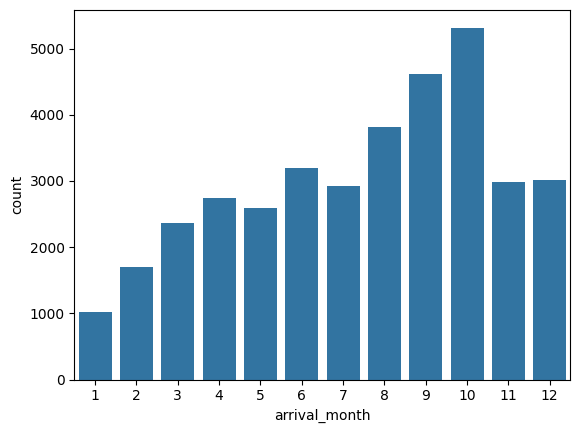

In [ ]:
sns.countplot(x=inn['arrival_month'])
plt.show()

Observations:

- According to the dataset the busiest months in the hotel are August, September, and October with the busiest month being October

### Which market segment do most of the guests come from?

In [ ]:
inn['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

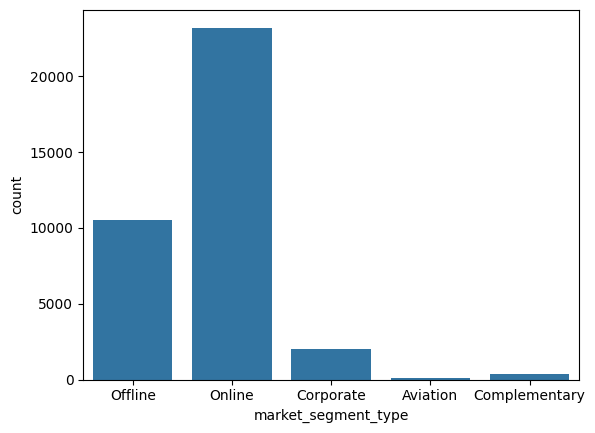

In [ ]:
sns.countplot(x=inn['market_segment_type'])
plt.show()

Observations:

- the vast majority of guests come from the online market segement, followed by offline

### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

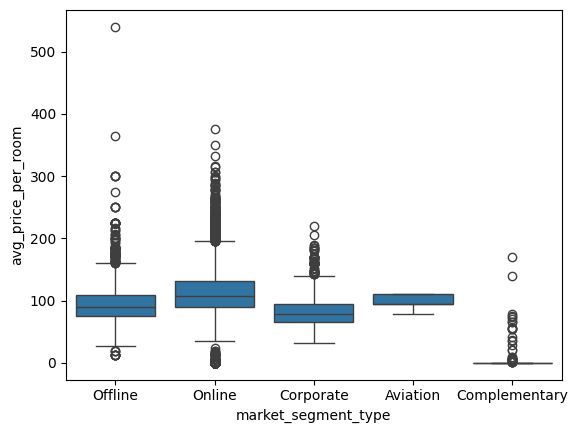

In [ ]:
sns.boxplot(x=inn['market_segment_type'], y=inn['avg_price_per_room'])
plt.show()

Observations:

- There are many outliers in the distributions of price for every demographic execpt for Aviation
- The complementary demographic has the narrowest distribution for price, and disregarding outliers 100% of the distribution lies at 0 euros
  - the existence of outliers for complimentary guests suggest some guests recieved complementary rooms vs complementary additional services such as meal plans
- Offline customers vary the most on price when considering outliers, online customers vary the most excluding outliers

### What percentage of bookings are canceled?

In [ ]:
inn['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [ ]:
inn['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled   0.67236
Canceled       0.32764
Name: proportion, dtype: float64

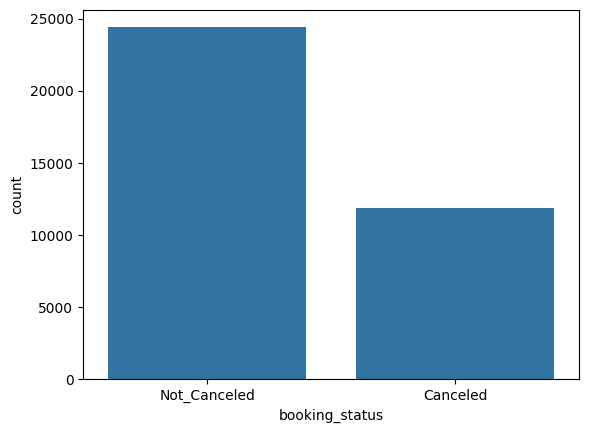

In [ ]:
sns.countplot(x=inn['booking_status'])
plt.show()

Observations:

- about 32% of bookings are canceled according to the dataset

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
inn['repeated_guest'].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

In [ ]:
inn.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).reset_index(name='percentage')

repeated_guest booking_status  percentage
0               0   Not_Canceled     0.66420
1               0       Canceled     0.33580
2               1   Not_Canceled     0.98280
3               1       Canceled     0.01720

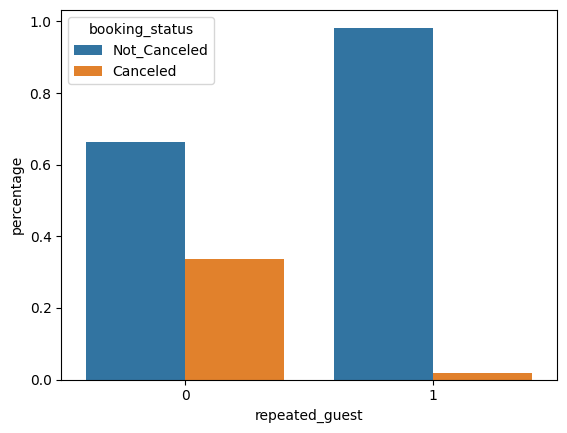

In [ ]:
sns.barplot(data=inn.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).reset_index(name='percentage'), x='repeated_guest', y='percentage', hue='booking_status')
plt.show()

Observations:

- about 1% of repeated guests cancel their booking
- the plot above suggests first time guests are much more likely to cancel their booking that repeat guests

### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
inn['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

In [ ]:
special_request_booking_status_proportions = inn.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).sort_index(ascending=False).reset_index(name='percentage')
special_request_booking_status_proportions

no_of_special_requests booking_status  percentage
0                       5   Not_Canceled     1.00000
1                       4   Not_Canceled     1.00000
2                       3   Not_Canceled     1.00000
3                       2   Not_Canceled     0.85403
4                       2       Canceled     0.14597
5                       1   Not_Canceled     0.76233
6                       1       Canceled     0.23767
7                       0   Not_Canceled     0.56793
8                       0       Canceled     0.43207

<Axes: xlabel='no_of_special_requests', ylabel='percentage'>

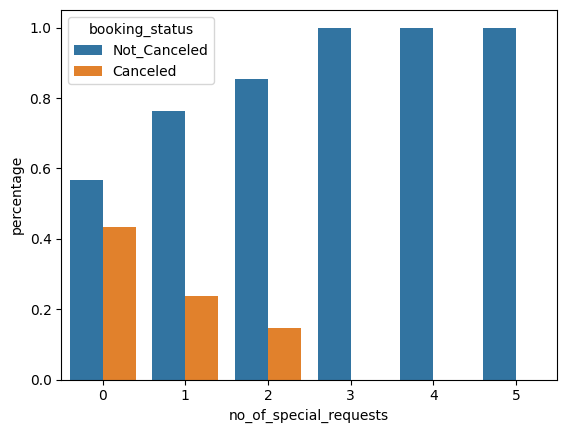

In [ ]:
sns.barplot(data=special_request_booking_status_proportions, x='no_of_special_requests', y='percentage', hue='booking_status')

Observations:

- no guests wo made 3 or more requests canceled
- the percentage of cancellations goes up for each group of customers who made 2, 1, and 0 requests respecitvely

### Number of nights

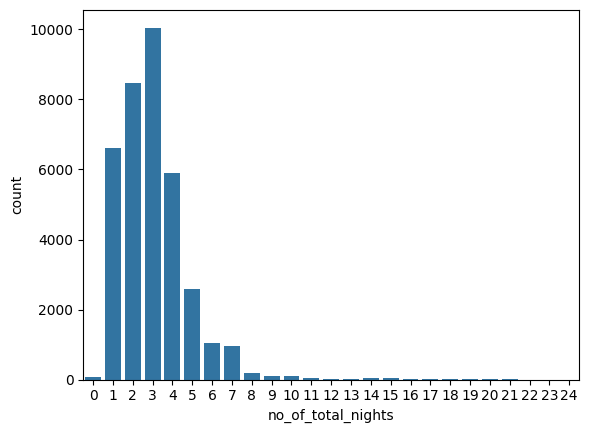

In [ ]:
inn['no_of_total_nights'] = inn['no_of_weekend_nights'] + inn['no_of_week_nights']
sns.countplot(x=inn['no_of_total_nights'])
plt.show()

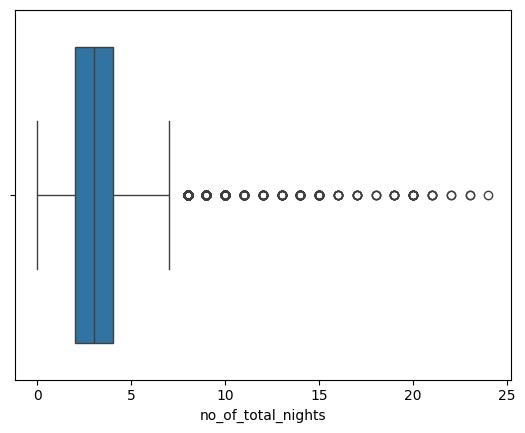

In [ ]:
sns.boxplot(x=inn['no_of_total_nights'])
plt.show()

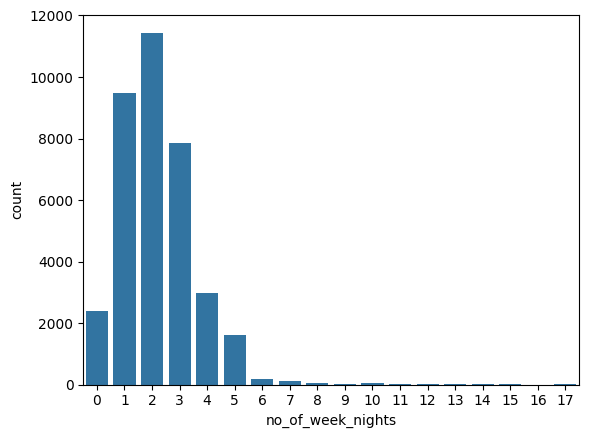

In [ ]:
sns.countplot(x=inn['no_of_week_nights'])
plt.show()

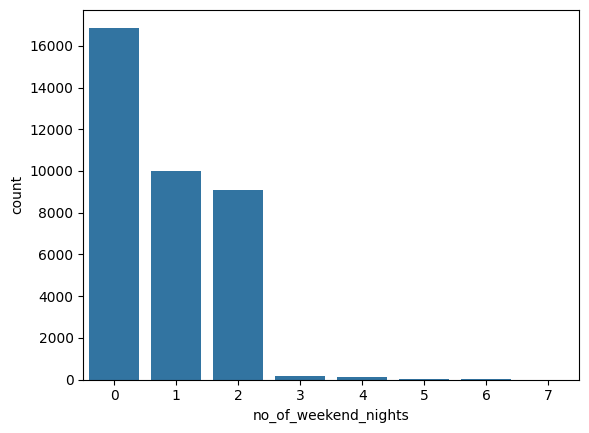

In [ ]:
sns.countplot(x=inn['no_of_weekend_nights'])
plt.show()

Observations:

- the vast majority of guests stay between 1-4 nights total
- 75% of guests stay between 2-7 nights
- very few bookings occur exclusively on the weekend
- most bookings do not have any weekend nights

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values: There are no missing values

### Feature Engineering




#### adding no_of_total_nights

In [ ]:
inn['no_of_total_nights'] = inn['no_of_weekend_nights'] + inn['no_of_week_nights']

#### I have noticed an issue with the field Zero Night Stays in the dataset. This field does not seem to have a relationship with any other field to definitevly answer:

- what causes a booking to be marked as a zero night stay?
- what does a zero night stay signify in the context of the data?
- are occurences of zero night stays the result of a specific situation or can they result from multiple situations?

#### Investigating Zero night stays

In [ ]:
zero_night_stays = inn[inn['no_of_total_nights'] == 0]
zero_night_stays.shape

(78, 20)

In [ ]:
zero_night_stays['booking_status'].value_counts(normalize=True)

booking_status
Not_Canceled   0.97436
Canceled       0.02564
Name: proportion, dtype: float64

In [ ]:
zero_night_stay_and_canceled = inn[(inn['no_of_total_nights'] == 0) & (inn['booking_status'] == 1)]
zero_night_stay_and_canceled.head()

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status, no_of_total_nights]
Index: []

In [ ]:
zero_night_stays['avg_price_per_room'].value_counts()

avg_price_per_room
0.00000    78
Name: count, dtype: int64

In [ ]:
zero_night_stays['market_segment_type'].value_counts()

market_segment_type
Online           65
Complementary    13
Name: count, dtype: int64

In [ ]:
zero_night_stays['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     57
Not Selected    16
Meal Plan 2      5
Name: count, dtype: int64

In [ ]:
zero_night_stays['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    64
Room_Type 4     9
Room_Type 6     2
Room_Type 2     2
Room_Type 7     1
Name: count, dtype: int64

In [ ]:
zero_night_stays['no_of_children'].value_counts()

no_of_children
0    73
1     3
2     2
Name: count, dtype: int64

In [ ]:
zero_night_stays['no_of_adults'].value_counts()

no_of_adults
2    47
1    30
3     1
Name: count, dtype: int64

In [ ]:
zero_night_stays['no_of_special_requests'].value_counts()

no_of_special_requests
1    34
0    34
2     9
3     1
Name: count, dtype: int64

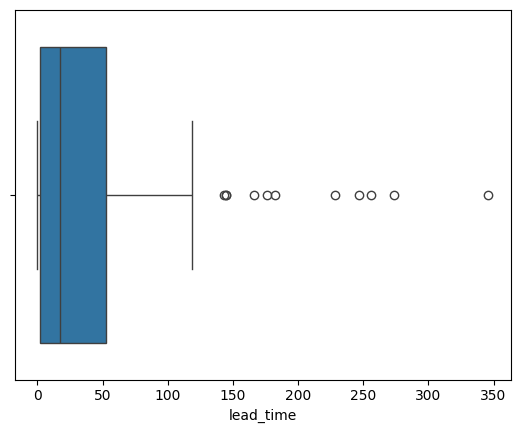

In [ ]:
sns.boxplot(x=zero_night_stays['lead_time'])
plt.show()

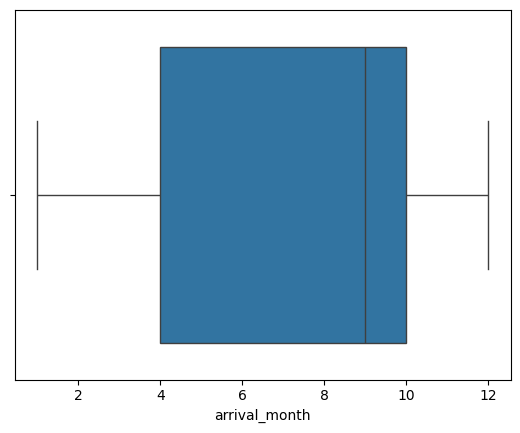

In [ ]:
sns.boxplot(x=zero_night_stays['arrival_month'])
plt.show()

In [ ]:
zero_night_stays['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0    77
1     1
Name: count, dtype: int64

In [ ]:
inn['no_of_total_nights'].describe()

count   36275.00000
mean        3.01502
std         1.78602
min         0.00000
25%         2.00000
50%         3.00000
75%         4.00000
max        24.00000
Name: no_of_total_nights, dtype: float64

In [ ]:
inn['no_of_week_nights'].describe()

count   36275.00000
mean        2.20430
std         1.41090
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max        17.00000
Name: no_of_week_nights, dtype: float64

In [ ]:
inn['no_of_weekend_nights'].describe()

count   36275.00000
mean        0.81072
std         0.87064
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         7.00000
Name: no_of_weekend_nights, dtype: float64

Observations: Zero Night Stays

- Some 0 night bookings end up being canceled, albiet a small percentage, which suggests that there might be a legitimate reason for a guest to book a 0 night stay. That being said, none of these bookings have a price per room value greater than 0, which might suggest a zero night stay is the result of a system error or unique backend process by the hotel.

- There does not seem to be a strong pattern with zero night stays and arrival month, lead time, special requests, number of adults / children, room type, type of meal plan or market segment

- The specification for number of nights being defined as the "number of nights the guest stayed or booked to stay" would suggest that if guests did not show up for their booking, they would still be marked with the amount of time they booked on their booking.
  - This suggests that zero night stays are not due to no shows

- 65/78 of the zero night stay values are in the 'online' as opposed to 'complimentary' market segments, suggesting zero night stays are not complimentary bookings, despite the price per room being 0 for all zero night stay rows

- It is also possible zero night stays represent:
  - Early check ins or check outs, however there are zero night stays with no special requests so this may be problematic
  - Placeholder bookings
  - Incomplete bookings
  - Data entry error
  - Duplicate cancellations, because 77/78 zero night stay rows have a history of previous cancellations


#### Editing Zero Night Stay Rows

- As I cannot find a logical reason to definitavely determine the case of zero night stay rows, I am treating these values as NULL and filling these rows with the median number of weeknights (2) and the median number of weekend nights (1) to equal the median number of total nights (3)

In [ ]:
inn.loc[inn['no_of_total_nights'] == 0, 'no_of_week_nights'] = 2
inn.loc[inn['no_of_total_nights'] == 0, 'no_of_weekend_nights'] = 1

In [ ]:
inn['no_of_total_nights'].describe()

count   36275.00000
mean        3.01502
std         1.78602
min         0.00000
25%         2.00000
50%         3.00000
75%         4.00000
max        24.00000
Name: no_of_total_nights, dtype: float64

#### Changing bookings to a value of 1 for canceled and 0 for not_canceled

In [ ]:
inn['booking_status'] = inn['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [ ]:
inn.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  no_of_total_nights  
0                       0               0                   3  
1                       1               0                   5  
2                       0               1                   3  
3                       0               1                   2  
4                       0               1                   2

In [ ]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Outlier detection and treatment

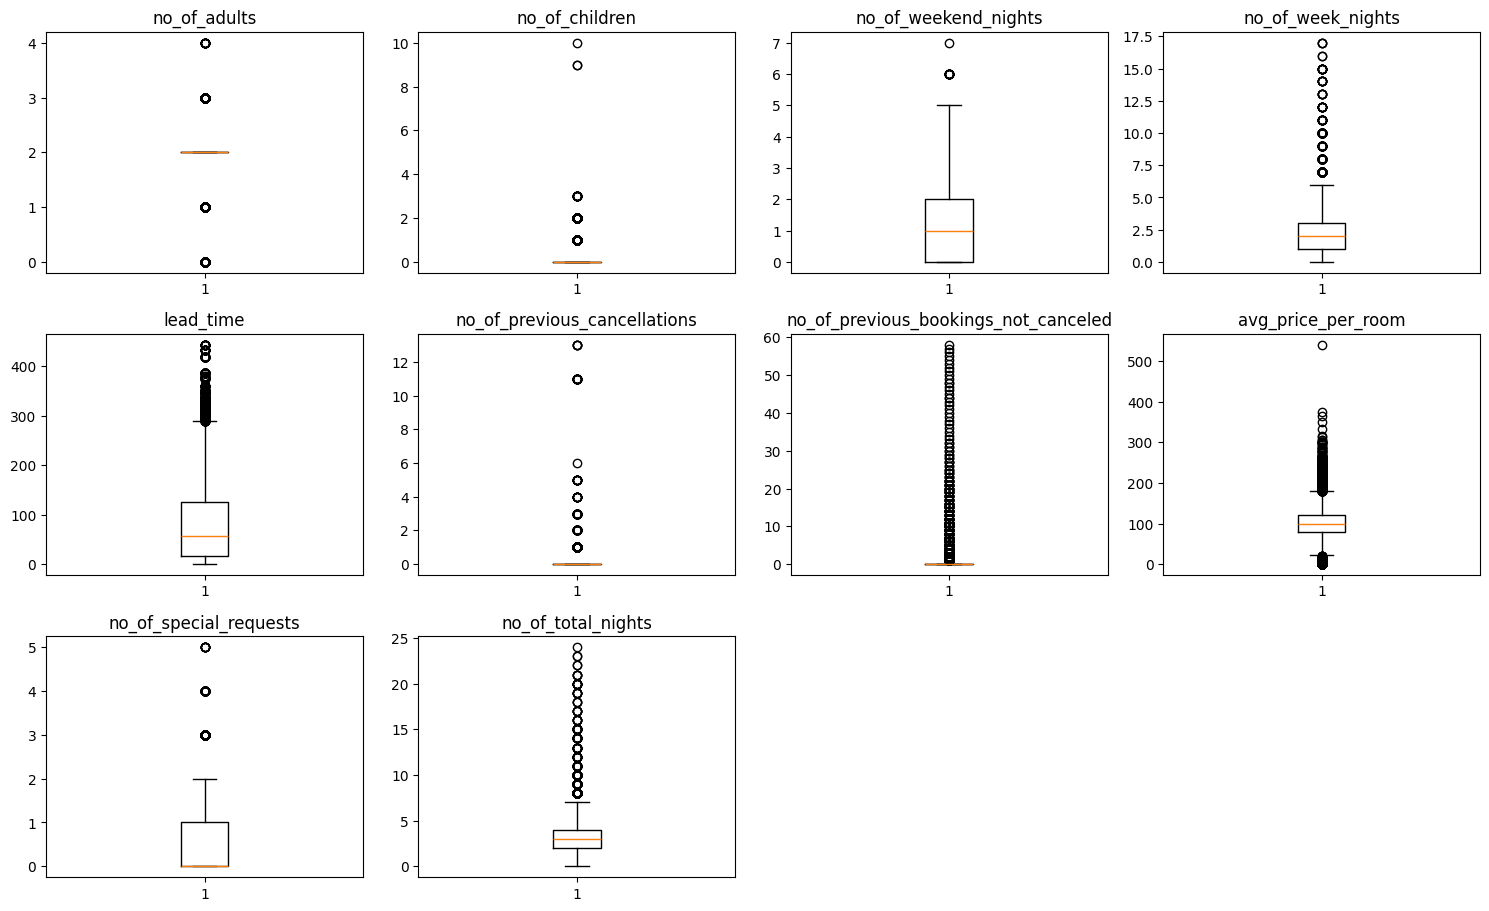

In [ ]:
inn_numerical = inn.select_dtypes(include=[np.number]).drop(columns=['booking_status', 'repeated_guest','required_car_parking_space', 'repeated_guest', 'arrival_year', 'arrival_month', 'arrival_date']) #create a dataframe for numerical data within inn, exluding some columns

plt.figure(figsize=(15, 12))


for i, variable in enumerate(inn_numerical): #iterate through numerical columns and create a boxplot to show outliers
    plt.subplot(4, 4, i + 1)
    plt.boxplot(inn[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
inn['avg_price_per_room'] = inn['avg_price_per_room'].replace([540],375) #replacing the 540 avg price outlier with the next highest value of 375

In [ ]:
inn['avg_price_per_room'].describe()

count   36275.00000
mean      103.41899
std        35.04349
min         0.00000
25%        80.30000
50%        99.45000
75%       120.00000
max       375.50000
Name: avg_price_per_room, dtype: float64

In [ ]:
inn['no_of_children']=inn['no_of_children'].replace([9,10], 3) #replacing the outliers of 9 and 10 children with the next highest maximum value of 3

Observations:

- there are many outliers in the data
- Avg price per room has 1 datapoint that is much higher than the rest, possibly indicating a typographical error or a highly unique circumstance.
 - the average price per room for that row has been changed to the median value of average price per room
- number of children has outliers at 9, 10 which is quite possibly a typographical error


### Preparing Data for Modeling

In [ ]:
INN = inn.copy() #copying the dataset

In [ ]:
INN=INN.drop(columns=['Booking_ID','no_of_total_nights']) #dropping the unique identifier Booking ID as it is not useful for modeling, and no of total nights will present multicollinearity issues

In [ ]:
X = INN.drop(columns=['booking_status'], axis=1) #define X as columns less booking status
Y = INN['booking_status']                        #define Y as booking status, the dependent variable

X=sm.add_constant(X)                             #add a constant to the independent variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)   #create dummies for independent variables
X = X.astype(float)                                                                                                #converting the data type of the independent variables to float

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)                           #splitting the test and train data

In [ ]:
print("Shape of Training set : ", X_Train.shape)
print("Shape of test set : ", X_Test.shape)
print("Percentage of Booking Status classifications in training set:")
print(Y_Train.value_counts(normalize=True))
print("Percentage of Booking Status classifications in test set:")
print(Y_Test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of Booking Status classifications in training set:
booking_status
0   0.67399
1   0.32601
Name: proportion, dtype: float64
Percentage of Booking Status classifications in test set:
booking_status
0   0.66857
1   0.33143
Name: proportion, dtype: float64


In [ ]:
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000       2.00000         0.00000               1.00000   
1 1.00000       2.00000         0.00000               2.00000   
2 1.00000       1.00000         0.00000               2.00000   
3 1.00000       2.00000         0.00000               0.00000   
4 1.00000       2.00000         0.00000               1.00000   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0            2.00000                     0.00000  224.00000    2017.00000   
1            3.00000                     0.00000    5.00000    2018.00000   
2            1.00000                     0.00000    1.00000    2018.00000   
3            2.00000                     0.00000  211.00000    2018.00000   
4            1.00000                     0.00000   48.00000    2018.00000   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0       10.00000       2.00000         0.00000                       0.00000   
1       11.00000       6.00000         0.00000                       0.00000   
2        2.00000      28.00000         0.00000                       0.00000   
3        5.00000      20.00000         0.00000                       0.00000   
4        4.00000      11.00000         0.00000                       0.00000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                               0.00000            65.00000   
1                               0.00000           106.68000   
2                               0.00000            60.00000   
3                               0.00000           100.00000   
4                               0.00000            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                 0.00000                        0.00000   
1                 1.00000                        0.00000   
2                 0.00000                        0.00000   
3                 0.00000                        0.00000   
4                 0.00000                        0.00000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                        0.00000                         0.00000   
1                        0.00000                         1.00000   
2                        0.00000                         0.00000   
3                        0.00000                         0.00000   
4                        0.00000                         1.00000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                            0.00000                        0.00000   
1                            0.00000                        0.00000   
2                            0.00000                        0.

In [ ]:
X.shape

(36275, 28)

Observations:

- there are approximately equal percentages of canceled booking status values in the training set as there are in the test set
  - this is important to verify before moving forward with the model, as the model will learn and test on similarly distributed data
  
- variables converted to integer and float will let us calculate the VIF later

## Univariate EDA

- It is a good idea to explore the data once again after manipulating it.

### Dataset statistical summary

In [ ]:
inn.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count   36275.00000     36275.00000           36275.00000        36275.00000   
mean        1.84496         0.10476               0.81287            2.20860   
std         0.51871         0.39466               0.86987            1.40722   
min         0.00000         0.00000               0.00000            0.00000   
25%         2.00000         0.00000               0.00000            1.00000   
50%         2.00000         0.00000               1.00000            2.00000   
75%         2.00000         0.00000               2.00000            3.00000   
max         4.00000         3.00000               7.00000           17.00000   

       required_car_parking_space   lead_time  arrival_year  arrival_month  \
count                 36275.00000 36275.00000   36275.00000    36275.00000   
mean                      0.03099    85.23256    2017.82043        7.42365   
std                       0.17328    85.93082       0.38384        3.06989   
min                       0.00000     0.00000    2017.00000        1.00000   
25%                       0.00000    17.00000    2018.00000        5.00000   
50%                       0.00000    57.00000    2018.00000        8.00000   
75%                       0.00000   126.00000    2018.00000       10.00000   
max                       1.00000   443.00000    2018.00000       12.00000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   36275.00000     36275.00000                   36275.00000   
mean       15.59700         0.02564                       0.02335   
std         8.74045         0.15805                       0.36833   
min         1.00000         0.00000                       0.00000   
25%         8.00000         0.00000                       0.00000   
50%        16.00000         0.00000                       0.00000   
75%        23.00000         0.00000                       0.00000   
max        31.00000         1.00000                      13.00000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                           36275.00000         36275.00000   
mean                                0.15341           103.41899   
std                                 1.75417            35.04349   
min                                 0.00000             0.00000   
25%                                 0.00000            80.30000   
50%                                 0.00000            99.45000   
75%                                 0.00000           120.00000   
max                                58.00000           375.50000   

       no_of_special_requests  booking_status  no_of_total_nights  
count             36275.00000     36275.00000         36275.00000  
mean                  0.61966         0.32764             3.01502  
std                   0.78624         0.46936             1.78602  
min                   0.00000         0.00000             0.00000  
25%                   0.00000         0.00000             2.00000  
50%                   0.00000         0.00000             3.00000  
75%                   1.00000         1.00000             4.00000  
max                   5.00000         1.00000            24.00000

Observations:

- many of the datapoints here would need to be rounded up or down as they are not truly numerical values for average, mean and standard deviation

- average price per room has an average of 103 euros and a maximum of 375 (excluding the outlier previously removed)

### Number of Adults

In [ ]:
inn['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

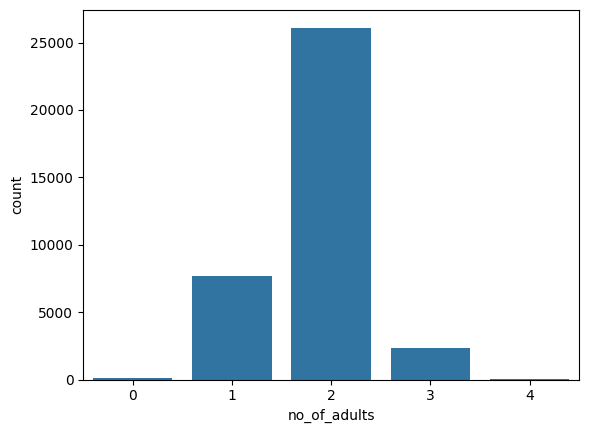

In [ ]:
sns.countplot(x=inn['no_of_adults'])
plt.show()

Observations:

- most bookings include just 2 adults
- the existence of a booking with no adults seems odd, but this could be due to children and their adult gaurdians being booked in a separate room

### Number of Children

In [ ]:
inn['no_of_children'].value_counts()

no_of_children
0    33577
1     1618
2     1058
3       22
Name: count, dtype: int64

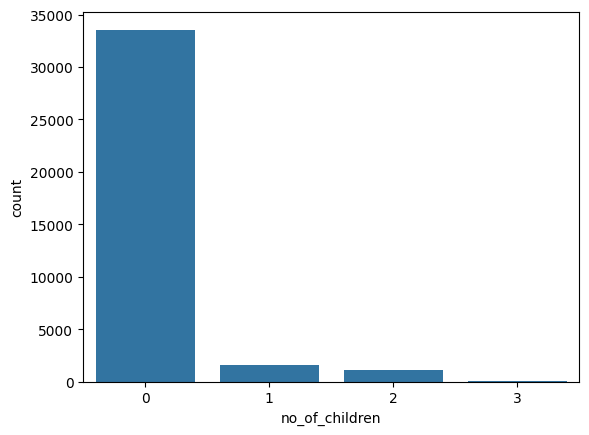

In [ ]:
sns.countplot(x=inn['no_of_children'])
plt.show()

In [ ]:
inn.groupby('no_of_children')['no_of_adults'].value_counts() #value counts of number of children and adults on bookings

no_of_children  no_of_adults
0               2               23719
                1                7551
                3                2291
                4                  16
1               2                1502
                1                  90
                3                  25
                0                   1
2               2                 871
                0                 133
                1                  53
                3                   1
3               2                  16
                0                   5
                1                   1
Name: count, dtype: int64

Observations:

- the vast majority of bookings have 0 children
- some bookings have children booked, but no adult

### Number of nights

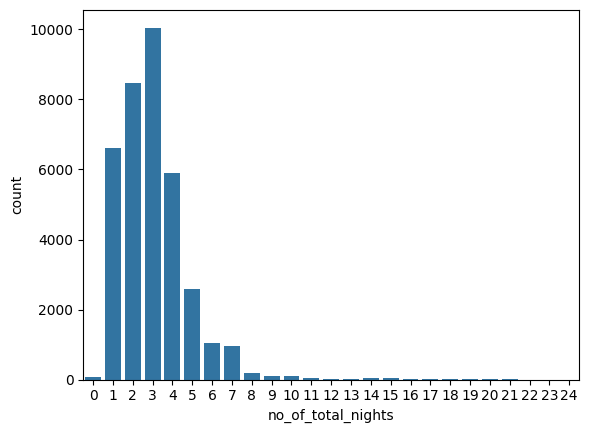

In [ ]:
sns.countplot(x=inn['no_of_total_nights'])
plt.show()

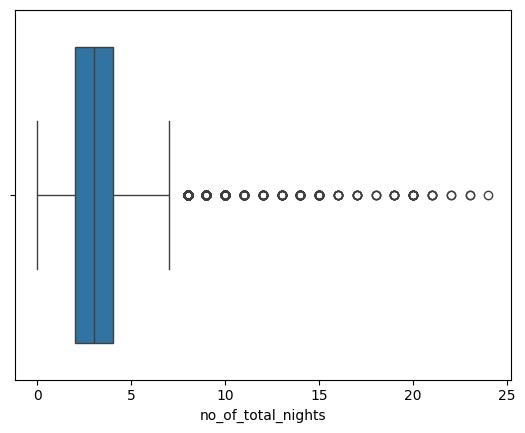

In [ ]:
sns.boxplot(x=inn['no_of_total_nights'])
plt.show()

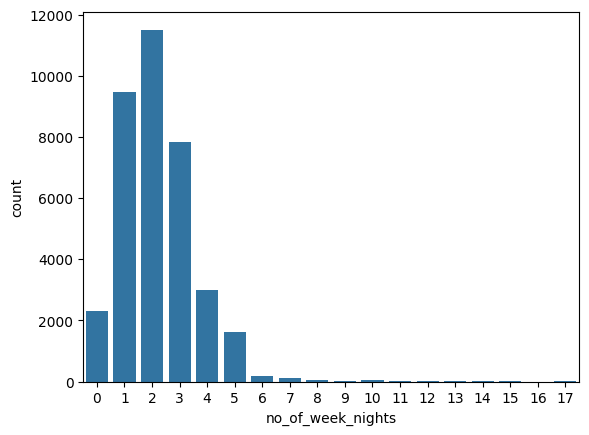

In [ ]:
sns.countplot(x=inn['no_of_week_nights'])
plt.show()

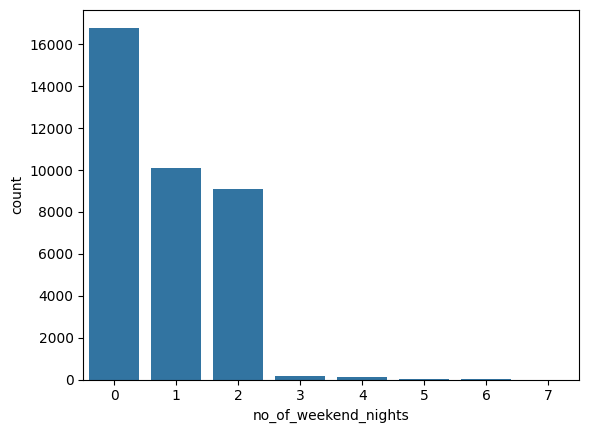

In [ ]:
sns.countplot(x=inn['no_of_weekend_nights'])
plt.show()

Observations:

- the vast majority of guests stay between 1-4 nights total
- 75% of guests stay between 2-7 nights
- very few bookings occur exclusively on the weekend
- most bookings do not have any weekend nights

### Meal Plan

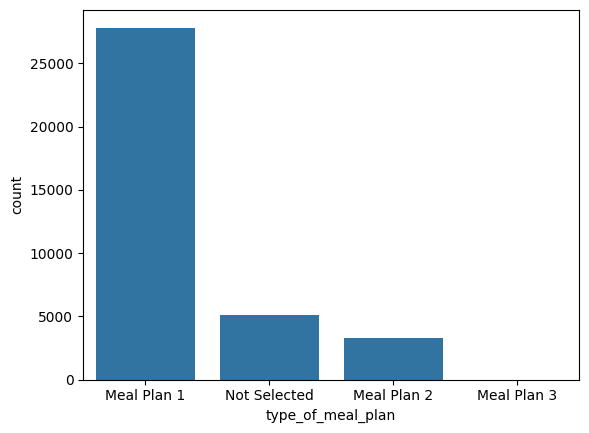

In [ ]:
sns.countplot(x=inn['type_of_meal_plan'])
plt.show()

Observations:

- the vast majority of guests chose meal plan 1

### Required Car Parking Space

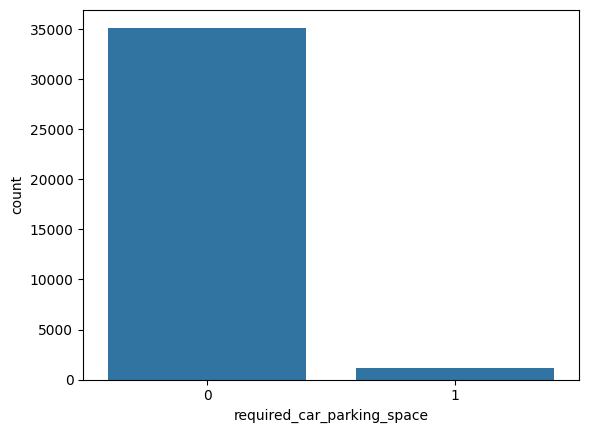

In [ ]:
sns.countplot(x=inn['required_car_parking_space'])
plt.show()

Observations:

- the vast majority of bookings did not require a car parking space

### Room Type Reserved

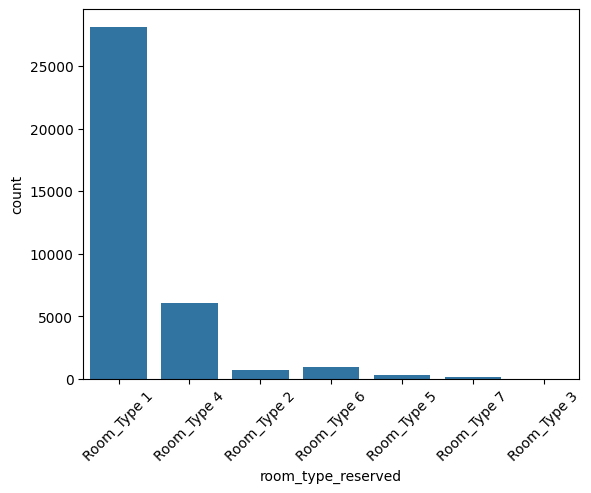

In [ ]:
sns.countplot(x=inn['room_type_reserved'])
plt.xticks(rotation=45)
plt.show()

Observations:

- the vast majority of guests booked room type 1

### Lead Time

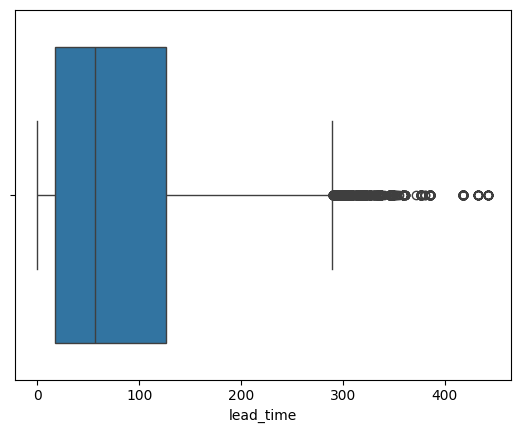

In [ ]:
sns.boxplot(x=inn['lead_time'])
plt.show()

Observations:

- about 50% of all bookings have a lead time within about 25 and 125 days

### Special Requests

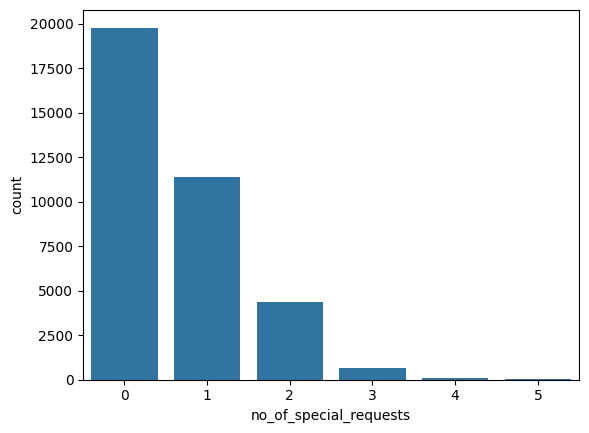

In [ ]:
sns.countplot(x=inn['no_of_special_requests'])
plt.show()

Observations:

- Mosts bookings do not have a special request, but there are a significant amount of bookings that have 1 or 2 requests

## Bivariate EDA

### Heatmap

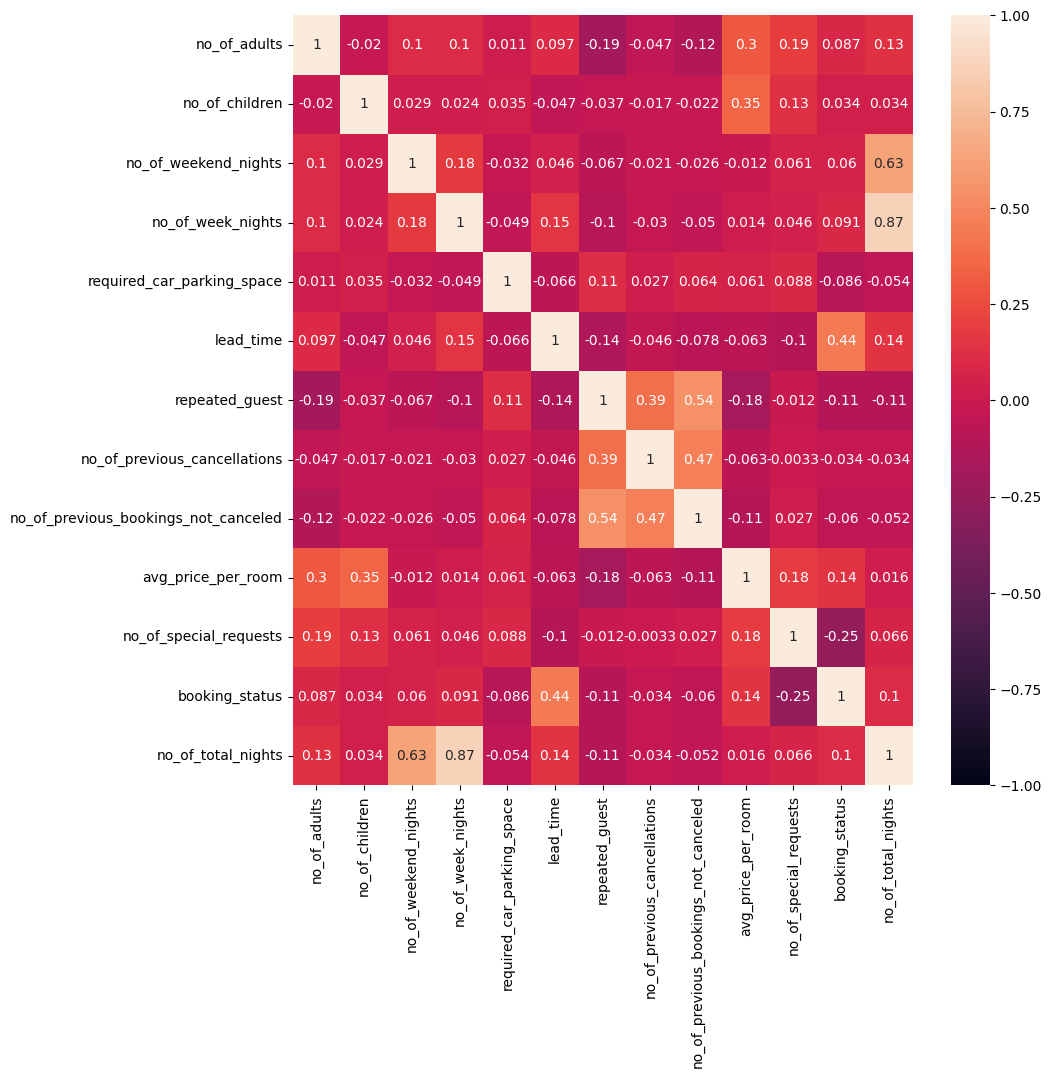

In [ ]:
heatmap_cols = inn.select_dtypes(include=[np.number]).drop(columns=['arrival_year', 'arrival_month', 'arrival_date'])
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_cols.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Observations:

- All of the data is either positevly correlated, or very slightly negatively correlated
- the highest correlation is number of weeknights and number of total nights, which makes sense at .88
- there is an interesting positive correlation of .47 for number of previous cancellations and number of previous bookings not canceled
- there is an interesting positive correlation of .35 or .30 for average price per room and number of children and number of adults respectively

### Average price per room and Month

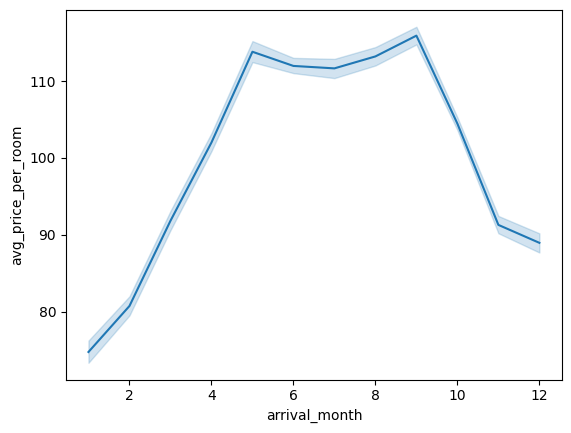

In [ ]:
sns.lineplot(x=inn['arrival_month'], y=inn['avg_price_per_room'])
plt.show()

Observations:

- average price per room seems to rise dramatically until May, where it slightly declines, then rises to its highest price in September
- average price per room declines sharply after September

In [ ]:
short_lead_time = inn[inn['lead_time'] < 20 ]
inn_short_lead_time = short_lead_time.copy()

In [ ]:
expected_rev_short_lead_time = inn_short_lead_time.groupby('lead_time')['avg_price_per_room']
lost_rev_short_lead_time = inn_short_lead_time[inn_short_lead_time['booking_status'] == 1]
lost_rev_short_lead_time.groupby('lead_time')['avg_price_per_room'].sum()

lead_time
0     8832.96000
1     8742.85000
2     4374.44000
3     6795.09000
4     7438.82000
5     9745.42000
6     6664.07000
7     6280.86000
8     6908.22000
9     5938.64000
10    8556.44000
11   10915.84000
12    7099.21000
13    4990.45000
14    7264.01000
15    7605.72000
16    5000.96000
17    6339.03000
18    7794.82000
19    8178.95000
Name: avg_price_per_room, dtype: float64

### Booking status and Lead Time

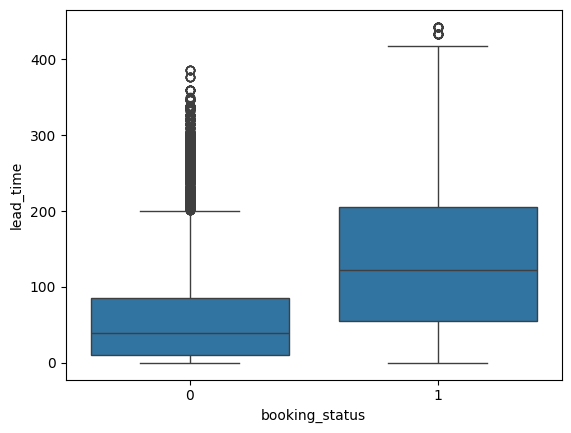

In [ ]:
sns.boxplot(x=inn['booking_status'], y=inn['lead_time'])
plt.show()

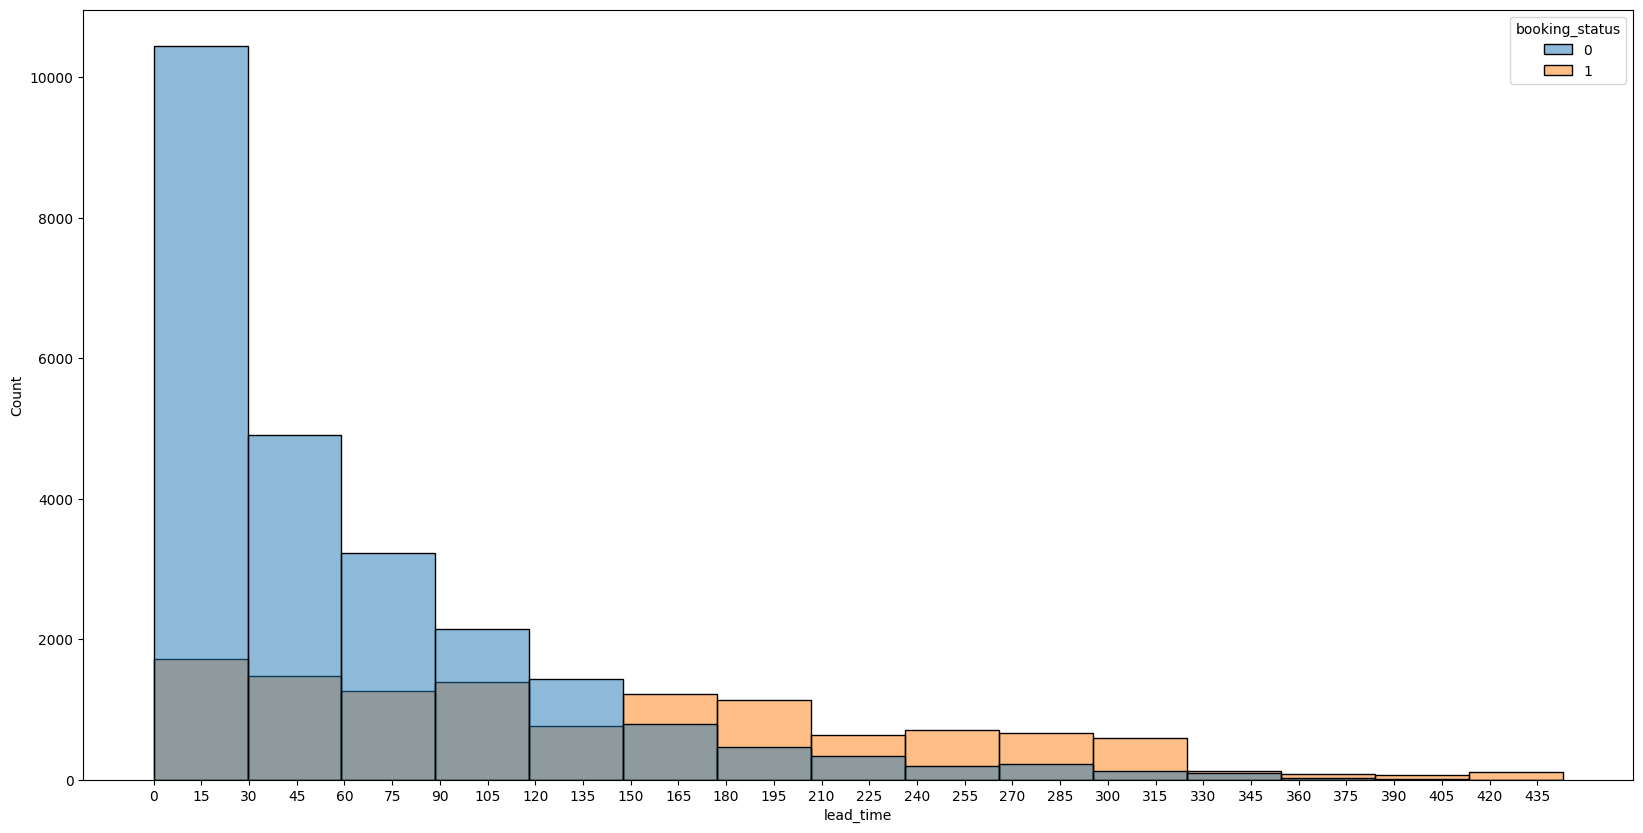

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=inn['lead_time'], hue=inn['booking_status'], bins= 15)
plt.xticks(ticks=np.arange(0, inn['lead_time'].max(),step=15))
plt.show()

Observations:

- canceled bookings are more evently distributed across different lead times than non canceled bookings
- bookings made well in advacne of about 150+ days have a higher chance of being canceled
- the greatest number of cancelations happens within 30 days of lead time, but is the smallest percentage of cancelations in this bin
- most bookings are made within 30 days of arrival

### Booking status and month

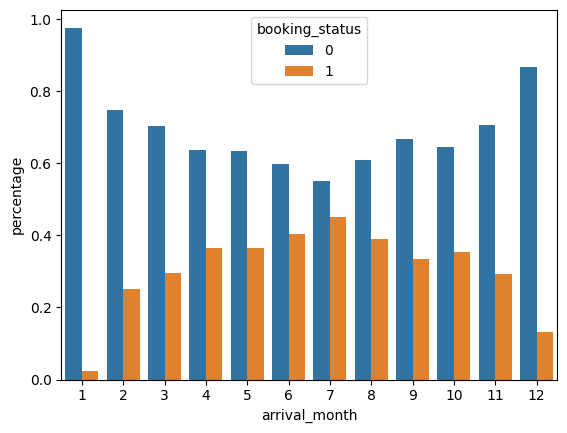

In [ ]:
sns.barplot(data=inn.groupby('arrival_month')['booking_status'].value_counts(normalize=True).reset_index(name='percentage'), x='arrival_month', y='percentage', hue='booking_status')
plt.show()

Observations:

- The percentage of bookings canceled rises from January to July, then tends to fall July - December, with January being the month with the fewest percentage of cancellations and july being the month with the largest percentage

### Booking Status and Market Segment

In [ ]:
booking_status_and_market_segment = inn.groupby('market_segment_type')['booking_status'].value_counts(normalize=True).reset_index(name='percentage')

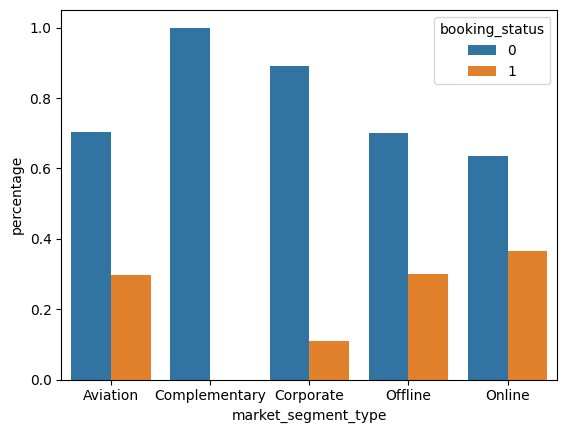

In [ ]:
sns.barplot(data=booking_status_and_market_segment, x='market_segment_type', y='percentage', hue='booking_status')
plt.show()

Observations:

- Online bookings have the highest percentage of cancellations
- No Complementary bookings canceled
- Corporate bookings have a low percentage of cancellations

### Booking Status and Average Price Per Room

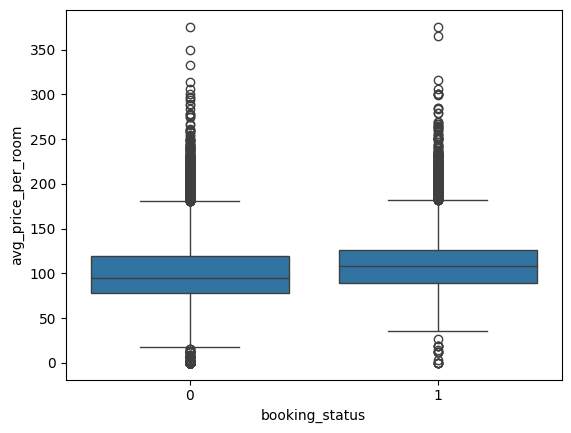

In [ ]:
sns.boxplot(x=inn['booking_status'], y=inn['avg_price_per_room'])
plt.show()

Observations:

- the distributions of average price per room separated by booking status look similar
- canceled bookings have a higher median average price per room, but not by much
- these boxplots suggest pricing has a minor influence on cancellations, but nothing major


### Booking Status and Special Requests

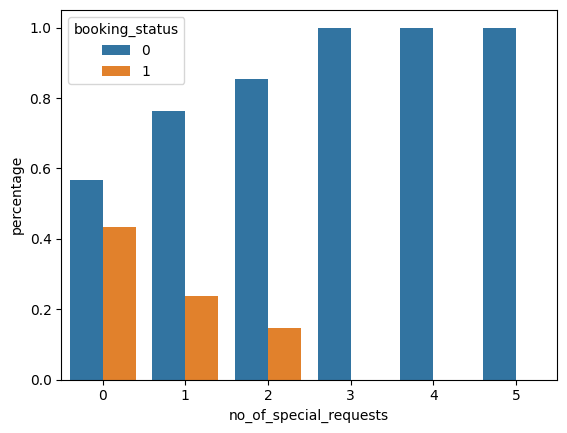

In [ ]:
booking_status_and_special_requests = inn.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).reset_index(name='percentage')
sns.barplot(data=booking_status_and_special_requests, x='no_of_special_requests', y='percentage', hue='booking_status')
plt.show()

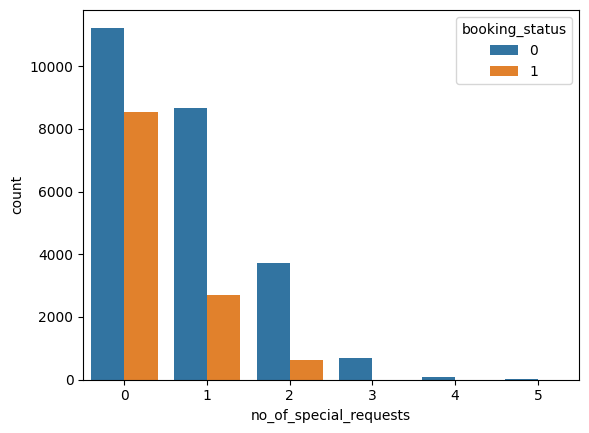

In [ ]:
sns.countplot(x=inn['no_of_special_requests'], hue=inn['booking_status'])
plt.show()

Observations:

- bookings with no special requests have the highest percentage of cancellations
- the percentage of cancellations goes down as the number of requests increase
- no guests with 3 or more special requests cancelled, suggesting that the more requests a guest makes, the less likely they are to cancel

- the largest number of cancellations comes from guests who have no special requests.
  - this number drops drastically when a booking has 1 request or more

### Booking Status and Number of previous cancellations

<Axes: xlabel='no_of_previous_cancellations', ylabel='percentage'>

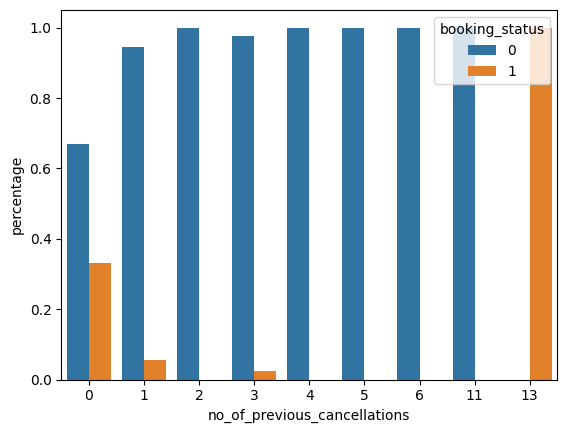

In [ ]:
sns.barplot(data=inn.groupby('no_of_previous_cancellations')['booking_status'].value_counts(normalize=True).reset_index(name='percentage'), x='no_of_previous_cancellations', y='percentage', hue='booking_status')

Observations:

- the percentage of cancellations is 100% for bookings that have previously canceled 13 times
- the percentage of cancellations is highest for 0 previous cancellations, and bookings with 2, 4, 5, 6, and 11 previous cancellations did not cancel
- this suggests that there may not be a strong correlation between cancellation and previous cancellations

### Booking Status and Nights stayed

<Axes: xlabel='no_of_total_nights', ylabel='percentage'>

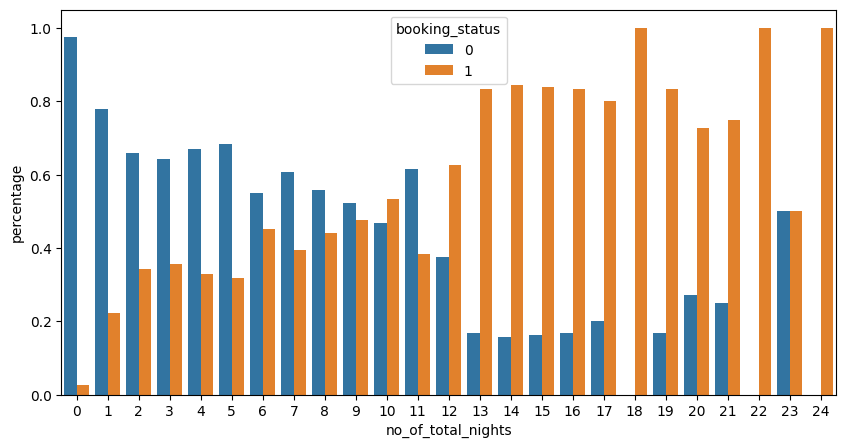

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=inn.groupby('no_of_total_nights')['booking_status'].value_counts(normalize=True).reset_index(name='percentage'), x='no_of_total_nights', y='percentage', hue='booking_status')

Observations:

- any stay booked longer than 12 nights has a greater percentage of cancellations than non cancellations, except for 23 nights which has an equal percentage

## Model Evaluation Criterion

**This model can make wrong predictions as:**

1. Predicting a customer will cancel their booking, when they will not cancel
2. Predicting a customer will not cancel their booking, when they will cancel

**Which case is more important?**

- Both cases are important as:
  - if we predict a customer will cancel their booking when they will not, we may have booked their room to another guest, or we may not be able to provide the same service as if we had predicted they would not cancel. This hurts the hotel's brand

  - if we predict a customer will not cancel their booking when they will, we will lose revenue on that booking, and potentialy other bookings as we did not predict the rooms would be empty.

**How to reduce this loss?**

  - we need to reduce both false negatives and false positives
  - f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

  - f1_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

## Building a Logistic Regression model

### Creating Functions for Model Testing

In [ ]:
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5): # defining a function to compute the performance of a classification model
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    pred_temp = model.predict(predictors) > threshold # checking which probabilities are greater than threshold

    pred = np.round(pred_temp)                        # rounding off the above values to get classes

    acc = accuracy_score(target, pred)                # to compute Accuracy
    recall = recall_score(target, pred)               # to compute Recall
    precision = precision_score(target, pred)         # to compute Precision
    f1 = f1_score(target, pred)                       # to compute F1-score

    inn_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0],) # creating a dataframe of metrics

    return inn_perf

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5): # defining a function to plot the confusion_matrix of a classification model

    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold    # checking which probabilities are greater than threshold
    y_pred = np.round(y_pred)                         # rounding off the above values to get classes
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression Model

In [ ]:
logit_model = sm.Logit(Y_Train, X_Train)                 # Initialize logistic regression model
lg = logit_model.fit(disp=False, maxiter=100)            # Fit the model to the training data
print(lg.summary())                                      # Print a detailed summary of the model results

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.3273
Time:                        00:03:25   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -835.2815    120.120     -6.954      0.000   -1070.713    -599.850
no_of_adults                             0.1228      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


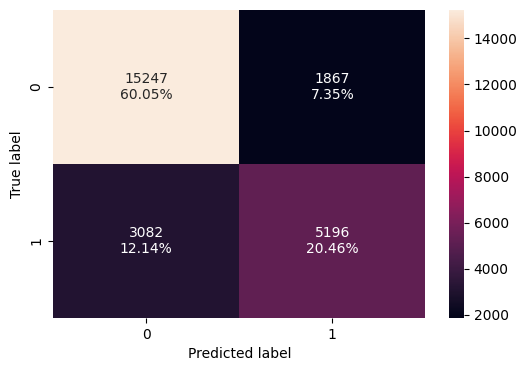

In [ ]:
confusion_matrix_statsmodels(lg, X_Train, Y_Train)

In [ ]:
model_performance_classification_statsmodels(lg, X_Train, Y_Train)

Accuracy  Recall  Precision      F1
0   0.80510 0.62769    0.73566 0.67740

Observations:

- Negative coefficient values decribe that the probability of a guest canceling their booking decreases with an increase in the respective variable

- Positive coefficient values describe that the probability of a guest canceling their booking increases with an increase in the respective variable

- p-values indicate the significance of a variable, at a significance of .05, any p value less than .05 would be considered significant

- we must get rid of multicollinearity in the data

- our model has an f1 score of .67, we will try to improve that

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

### VIF

In [ ]:
vif_series = pd.Series([variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])],index=X_Train.columns,dtype=float)  # Calculate VIF for each independent variable
vif_series = vif_series.sort_values(ascending=False)  # Sort VIF values in descending order

vif_df = pd.DataFrame(vif_series, columns=['VIF'])  # Create a DataFrame from the VIF series
vif_df


VIF
const                                39374928.35826
market_segment_type_Online                 71.43707
market_segment_type_Offline                64.41962
market_segment_type_Corporate              17.21450
market_segment_type_Complementary           4.49291
no_of_children                              2.09472
avg_price_per_room                          2.05946
room_type_reserved_Room_Type 6              2.04894
repeated_guest                              1.76769
no_of_previous_bookings_not_canceled        1.61800
arrival_year                                1.43041
lead_time                                   1.39196
no_of_previous_cancellations                1.37025
room_type_reserved_Room_Type 4              1.35813
no_of_adults                                1.34472
type_of_meal_plan_Not Selected              1.27643
arrival_month                               1.27181
type_of_meal_plan_Meal Plan 2               1.26414
no_of_special_requests                      1.24643
room_type_reserved_Room_Type 7              1.10638
room_type_reserved_Room_Type 2              1.09628
no_of_week_nights                           1.09168
no_of_weekend_nights                        1.06603
required_car_parking_space                  1.03710
room_type_reserved_Room_Type 5              1.03328
arrival_date                                1.00672
type_of_meal_plan_Meal Plan 3               1.00611
room_type_reserved_Room_Type 3              1.00489

Observations:

- There are no values with VIF greater than 5 that need to be dropped
  - we are excluding dummy variables from our observations on VIF

### P-Values

In [ ]:
X_cols = X_Train.columns.tolist()  # List of X columns
max_p_value = 1                    # Setting max P value to 1

while len(X_cols) > 0:
    X_train_aux = X_Train[X_cols]  # Defining the train set
    model = sm.Logit(Y_Train, X_train_aux).fit(disp=False, maxiter=100)  # Fitting the model

    p_values = model.pvalues  # Getting the p-values and the maximum p-value
    max_p_value = max(p_values)
    variable_with_p_max = p_values.idxmax()  # Name of the variable with maximum p-value

    if max_p_value > 0.05:  # Check if the maximum p-value is above 0.05
        X_cols.remove(variable_with_p_max)
    else:
        break

selected_variables = X_cols  # Final list of selected variables

selected_variables_df = pd.DataFrame(selected_variables, columns=['Selected Variables'])
selected_variables_df



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Selected Variables
0                            const
1                     no_of_adults
2             no_of_weekend_nights
3                no_of_week_nights
4       required_car_parking_space
5                        lead_time
6                     arrival_year
7                    arrival_month
8                   repeated_guest
9     no_of_previous_cancellations
10              avg_price_per_room
11          no_of_special_requests
12   type_of_meal_plan_Meal Plan 2
13  type_of_meal_plan_Not Selected
14  room_type_reserved_Room_Type 2
15  room_type_reserved_Room_Type 4
16  room_type_reserved_Room_Type 5
17  room_type_reserved_Room_Type 6
18  room_type_reserved_Room_Type 7
19     market_segment_type_Offline
20      market_segment_type_Online

In [ ]:
X_Train_1 = X_Train[selected_variables]  # Keep only selected variables in the training set
X_Test_1 = X_Test[selected_variables]    # Keep only selected variables in the test set

In [ ]:
logit_model_1 =sm.Logit(Y_Train,X_Train_1)
lg_1 =logit_model_1.fit(maxiter=100)
print(lg_1.summary2())

Optimization terminated successfully.
         Current function value: 0.425341
         Iterations 11
                                    Results: Logit
Model:                     Logit                   Method:                  MLE       
Dependent Variable:        booking_status          Pseudo R-squared:        0.326     
Date:                      2024-11-08 00:03        AIC:                     21642.5321
No. Observations:          25392                   BIC:                     21813.5181
Df Model:                  20                      Log-Likelihood:          -10800.   
Df Residuals:              25371                   LL-Null:                 -16030.   
Converged:                 1.0000                  LLR p-value:             0.0000    
No. Iterations:            11.0000                 Scale:                   1.0000    
--------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z     P>|z

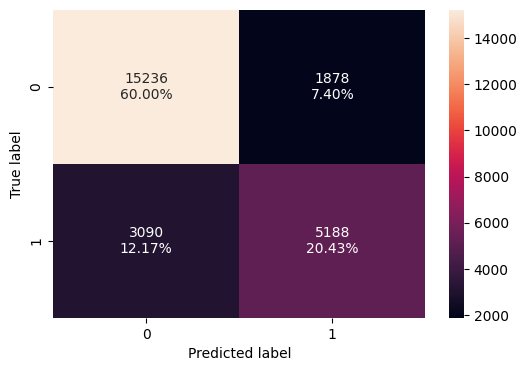

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Train_1, Y_Train)

In [ ]:
model_performance_classification_statsmodels(lg_1, X_Train_1, Y_Train)

Accuracy  Recall  Precision      F1
0   0.80435 0.62672    0.73422 0.67623

Observations:

- We have no variables with a VIF > 5 and have selected the variables for our final model with P values less than .05

- We have an F1 of .67 which is only a .001 change from the last model

- our False Positives and False Negatives have gone up by a negligible amount

### Converting Coefficients to odds

In [ ]:
odds = np.exp(lg.params)                                                               # converting coefficients to odds

perc_change_odds = (np.exp(lg.params) - 1) * 100                                       # finding the percentage change

pd.set_option("display.max_columns", None)                                              # removing limit from number of columns to display

pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_Train_1.columns).T # adding the odds to a dataframe

const  no_of_adults  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000       1.13061               1.12753            1.03185   
Change_odd% -100.00000      13.06092              12.75264            3.18453   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.18270    1.01559       1.51065   
Change_odd%                   -81.73008    1.55866      51.06483   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95803         0.07635                       1.30507   
Change_odd%       -4.19688       -92.36476                      30.50731   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01881                 0.22625   
Change_odd%             1.88148               -77.37477   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.19370                         1.21317   
Change_odd%                       19.36987                        21.31725   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.64344                         0.75280   
Change_odd%                       -35.65641                       -24.71978   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50348                         0.38395   
Change_odd%                       -49.65220                       -61.60507   

             room_type_reserved_Room_Type 7  market_segment_type_Offline  \
Odds                                0.28650                      0.15888   
Change_odd%                       -71.34972                    -84.11191   

             market_segment_type_Online  
Odds                            0.95216  
Change_odd%                    -4.78396

Observations:

- Holding all other features constant, a unit change in number of adults will increase the odds of a customer canceling their booking by 11.3 percent

- all other variables can be interpreted similarly

## Model performance evaluation

### Model performance on Train Data

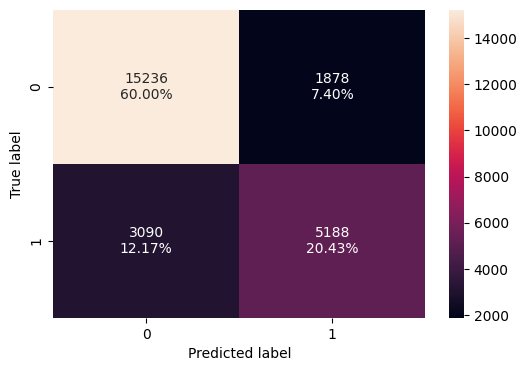

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Train_1, Y_Train) # confusion matrix for training set

In [ ]:
log_reg_model_train_performance = model_performance_classification_statsmodels(lg_1, X_Train_1, Y_Train) # model performance for training set
log_reg_model_train_performance

Accuracy  Recall  Precision      F1
0   0.80435 0.62672    0.73422 0.67623

Observations:

- the model performes with a .67 F1 score on the training data

### Model Performance on Test Data

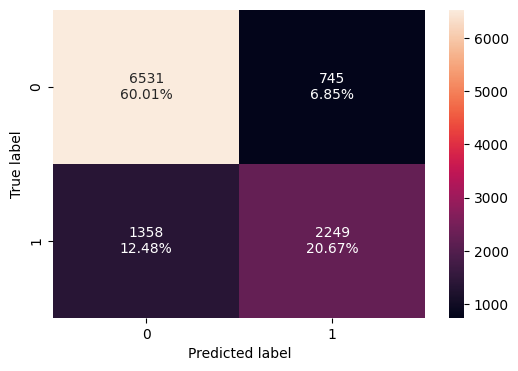

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Test_1, Y_Test) # confusion matrix for test set

In [ ]:
log_reg_model_test_performance = model_performance_classification_statsmodels(lg_1, X_Test_1, Y_Test) # model performance for test set
log_reg_model_test_performance

Accuracy  Recall  Precision      F1
0   0.80676 0.62351    0.75117 0.68141

Observations:

- the model is giving an F1 score of .676 and .68 on the train and test data respectively

- the model is not overfitting as these scores are comparable

- we will lookg to improve the performance of the model

### ROC-AUC

#### ROC-AUC on training set

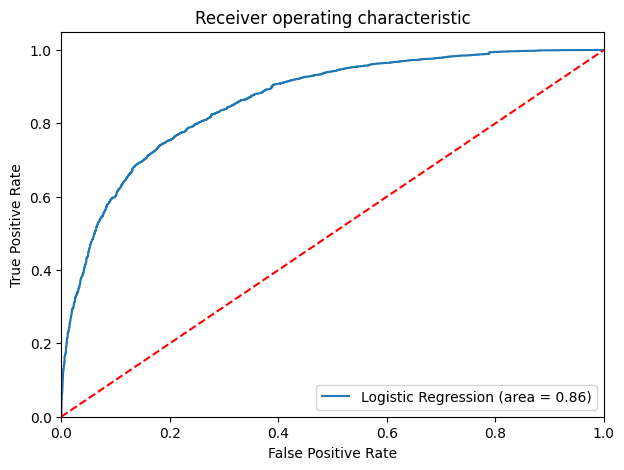

In [ ]:
logit_roc_auc_train = roc_auc_score(Y_Train, lg_1.predict(X_Train_1)) # computing the ROC-AUC score for training set
fpr, tpr, thresholds = roc_curve(Y_Train, lg_1.predict(X_Train_1)) # computing the FPR and TPR
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")                                      # Diagonal line for random predictions
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observations:

- with an area under the curve of .86 the model is performing well

#### Optimal threshold using AUC-ROC curve

- Optimal cut off is where tpr is high and fpr is low

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.3626760872263746


#### Model performance on Train Data

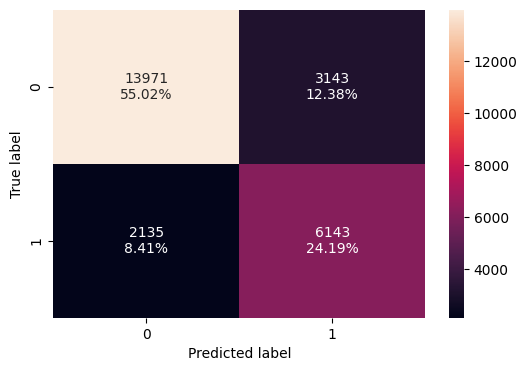

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Train_1, Y_Train, optimal_threshold)

In [ ]:
log_reg_model_train_performance_optimal_auc = model_performance_classification_statsmodels(lg_1, X_Train_1, Y_Train, optimal_threshold)
log_reg_model_train_performance_optimal_auc

Accuracy  Recall  Precision      F1
0   0.79214 0.74209    0.66153 0.69950

Observations:

- F1 increased to .699, Precision decreased to .66, recall increased to .74 and Accuracy fell to .79


#### Model performance on Test Data

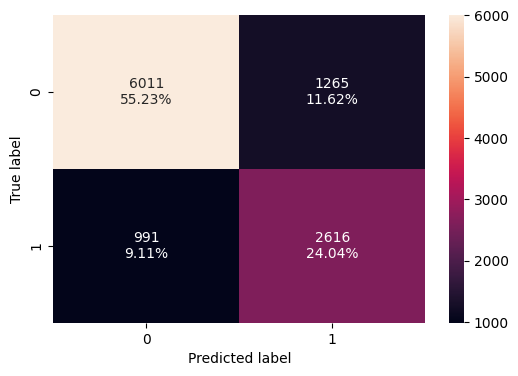

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Test_1, Y_Test, optimal_threshold)

In [ ]:
log_reg_model_test_performance_optimal_auc = model_performance_classification_statsmodels(lg_1, X_Test_1, Y_Test, optimal_threshold)
log_reg_model_test_performance_optimal_auc

Accuracy  Recall  Precision      F1
0   0.79270 0.72526    0.67405 0.69872

Observations:

- F1 increased to .698, Precision fell to .67, recall increased to .72 and accuracy decreased to .79

### Precision-Recall Curve

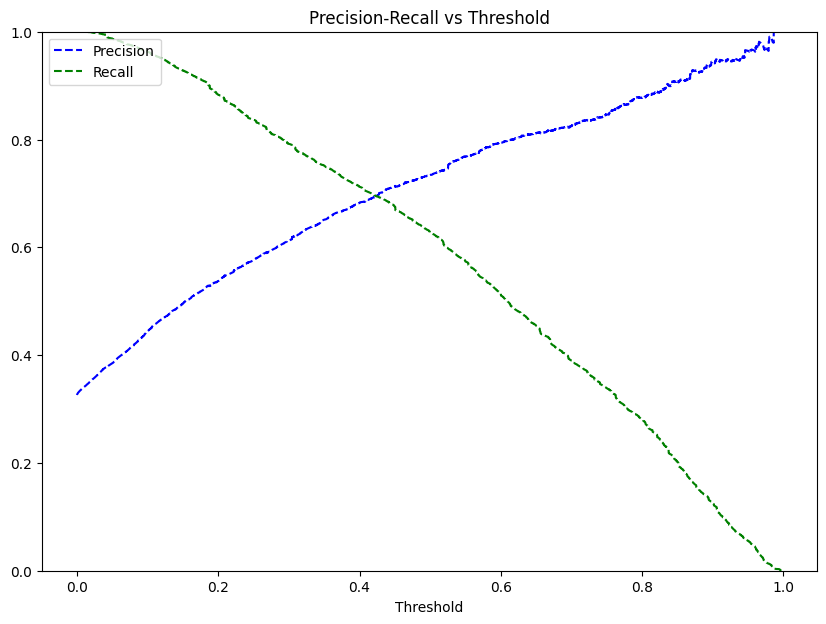

In [ ]:
y_scores = lg_1.predict(X_Train_1)                                  # Predict the scores for the training set

prec, rec, tre = precision_recall_curve(Y_Train, y_scores)          # Compute precision and recall

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):    # Function to plot precision and recall against thresholds
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")  # Plot precision
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")       # Plot recall
    plt.xlabel("Threshold")                                         # Label for x-axis
    plt.legend(loc="upper left")                                   # Legend position
    plt.ylim([0, 1])                                              # Set y-axis limits

# Create the plot
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.title("Precision-Recall vs Threshold")                      # Title for the plot
plt.show()


In [ ]:
optimal_threshold_Precision_Recall_Curve = .42

Observations:

- at a threshold of around .42 we gain equal precision and recall

#### Model Performance on Train Data

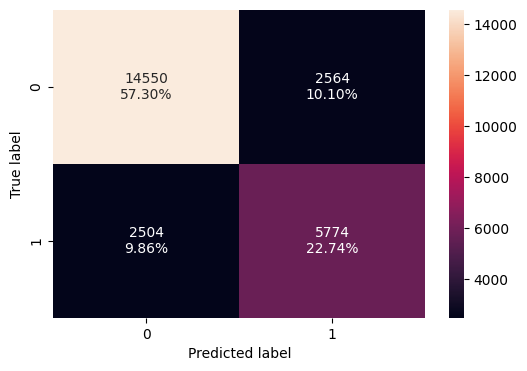

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Train_1, Y_Train, optimal_threshold_Precision_Recall_Curve)

In [ ]:
log_reg_model_train_performance_optimal_precision_recall = model_performance_classification_statsmodels(lg_1, X_Train_1, Y_Train, optimal_threshold_Precision_Recall_Curve)
log_reg_model_train_performance_optimal_precision_recall

Accuracy  Recall  Precision      F1
0   0.80041 0.69751    0.69249 0.69499

Observations:

- F1 score decreased negligibly to .694, precision increased to .69, recall decreased to .69 and accuracy rose to .80


#### Model Performance on Test Data

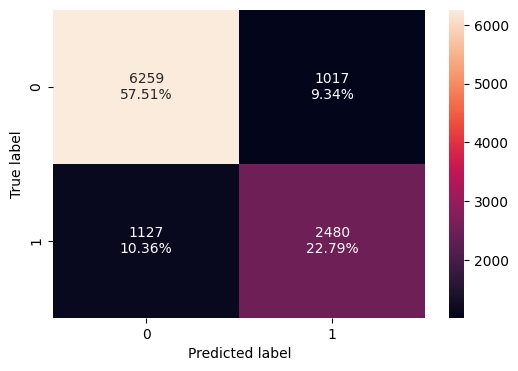

In [ ]:
confusion_matrix_statsmodels(lg_1, X_Test_1, Y_Test, optimal_threshold_Precision_Recall_Curve)

In [ ]:
log_reg_model_test_performance_optimal_precision_recall = model_performance_classification_statsmodels(lg_1, X_Test_1, Y_Test, optimal_threshold_Precision_Recall_Curve)
log_reg_model_test_performance_optimal_precision_recall

Accuracy  Recall  Precision      F1
0   0.80300 0.68755    0.70918 0.69820

Observations:

- F1 approximately the same, precision rose to .70, recall fell to .68 and accuracy rose to .80


## Final Model Summary

### Training Performance Comparison

In [ ]:
combined_models_train_df = pd.concat(                      # Combine the training performance dataframes for different logistic regression thresholds
    [
        log_reg_model_test_performance.T,                     # Transpose of the default threshold performance
        log_reg_model_train_performance_optimal_auc.T,  # Transpose of the AUC-ROC threshold performance
        log_reg_model_train_performance_optimal_precision_recall.T,     # Transpose of the threshold curve performance
    ],
    axis=1,                                            # Concatenate along the columns
)

combined_models_train_df.columns = [
    "Logistic Regression-default Threshold (0.5)",   # Default threshold performance
    "Logistic Regression-0.36 Threshold",             # Performance at threshold of 0.36
    "Logistic Regression-0.42 Threshold",             # Performance at threshold of 0.42
]

print("Training performance comparison:")
combined_models_train_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80676   
Recall                                         0.62351   
Precision                                      0.75117   
F1                                             0.68141   

           Logistic Regression-0.36 Threshold  \
Accuracy                              0.79214   
Recall                                0.74209   
Precision                             0.66153   
F1                                    0.69950   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80041  
Recall                                0.69751  
Precision                             0.69249  
F1                                    0.69499

In [ ]:
combined_models_test_df = pd.concat(                      # Combine the training performance dataframes for different logistic regression thresholds
    [
        log_reg_model_train_performance.T,                     # Transpose of the default threshold performance
        log_reg_model_test_performance_optimal_auc.T,  # Transpose of the AUC-ROC threshold performance
        log_reg_model_test_performance_optimal_precision_recall.T,     # Transpose of the threshold curve performance
    ],
    axis=1,                                            # Concatenate along the columns
)

combined_models_test_df.columns = [
    "Logistic Regression-default Threshold (0.5)",   # Default threshold performance
    "Logistic Regression-0.36 Threshold",             # Performance at threshold of 0.36
    "Logistic Regression-0.42 Threshold",             # Performance at threshold of 0.42
]


print("Training performance comparison:")
combined_models_test_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80435   
Recall                                         0.62672   
Precision                                      0.73422   
F1                                             0.67623   

           Logistic Regression-0.36 Threshold  \
Accuracy                              0.79270   
Recall                                0.72526   
Precision                             0.67405   
F1                                    0.69872   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80300  
Recall                                0.68755  
Precision                             0.70918  
F1                                    0.69820

Observations:

- all models perform very closely to one another
- the model that maximizes the F1 score is the Logistic Regression with .36 threshold
  - this model with a .698 F1 score can be used to predict whether a customer will cancel a booking with 79% accuracy, and reduces the amount of false positives and false negatives both within the data

## Building a Decision Tree model

### Creating Functions for Model Testing

In [ ]:
X = INN.drop(columns=['booking_status'], axis=1) #define X as columns less booking status
Y = INN['booking_status']                        #define Y as booking status, the dependent variable

X=sm.add_constant(X)                             #add a constant to the independent variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)   #create dummies for independent variables
X = X.astype(float)                                                                                                #converting the data type of the independent variables to float

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)                           #splitting the test and train data

In [ ]:
def model_performance_classification_sklearn(model, predictors, target): # defining a function to compute the performance of a classification model
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)                  # predicting using independent variables

    acc = accuracy_score(target, pred)                # to compute Accuracy
    recall = recall_score(target, pred)               # to compute Recall
    precision = precision_score(target, pred)         # to compute Precision
    f1 = f1_score(target, pred)                       # to compute F1-score

    inn_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0],) # creating a dataframe of metrics

    return inn_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target): # defining a function to plot the confusion_matrix of a classification model

    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable1
    """
    y_pred = model.predict(predictors)                #predicting the independent variables
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',random_state=42)
decision_tree_model.fit(X_Train, Y_Train )

DecisionTreeClassifier(random_state=42)

### Model performance on Train Data

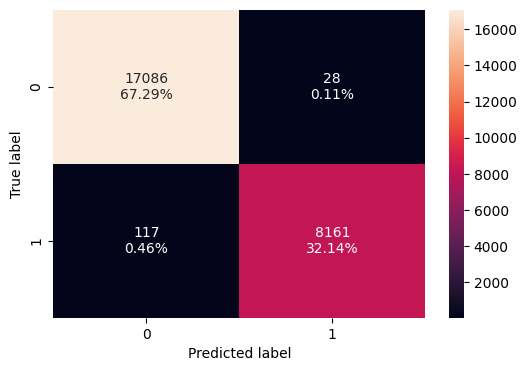

In [ ]:
confusion_matrix_sklearn(decision_tree_model, X_Train, Y_Train)

In [ ]:
decision_tree_performance_train = model_performance_classification_sklearn(decision_tree_model, X_Train, Y_Train)
decision_tree_performance_train

Accuracy  Recall  Precision      F1
0   0.99429 0.98587    0.99658 0.99119

Observations:

 - this model fits the training data very well
    - F1 score is .99
 - this model is likely overfitting because we have not added parameters to the decision tree
 - testing on the test data will confirm overfitting

### Model performance on Test Data

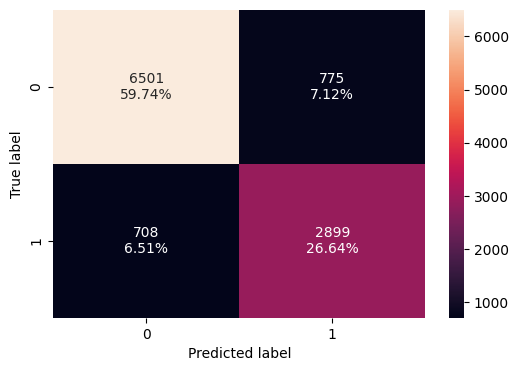

In [ ]:
confusion_matrix_sklearn(decision_tree_model, X_Test, Y_Test)

In [ ]:
decision_tree_performance_test = model_performance_classification_sklearn(decision_tree_model, X_Test, Y_Test)
decision_tree_performance_test

Accuracy  Recall  Precision      F1
0   0.86373 0.80371    0.78906 0.79632

Observations:

- the model performed less well on the training data
  - the F1 score dropped to .796
- we may need to prune the tree

### Visualizing the Decision Tree

In [ ]:
decision_tree_column_names = list(X.columns)
variable_names = decision_tree_column_names
variable_names

['const',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

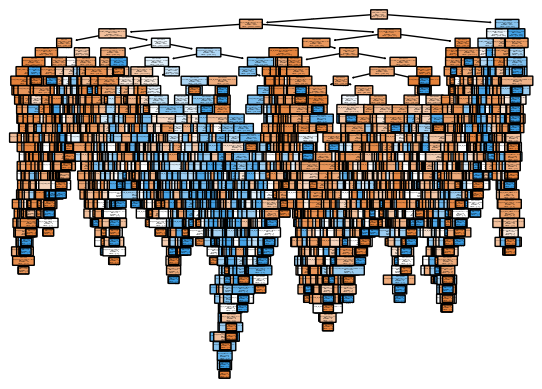

In [ ]:
out = tree.plot_tree(decision_tree_model, filled=True, rounded=True, feature_names=variable_names, class_names=True, node_ids=True)
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1.5)
  plt.show()

Observations:

- we can clearly see that this decision tree is highly complex and needs pruning

## Do we need to prune the tree?

### Pre-Pruning

In [ ]:
estimator = DecisionTreeClassifier(random_state=42) # Choose the type of classifier.

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_Train, Y_Train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_leaf_nodes=250, min_samples_split=10,
                       random_state=42)

### Model performance on Train Data

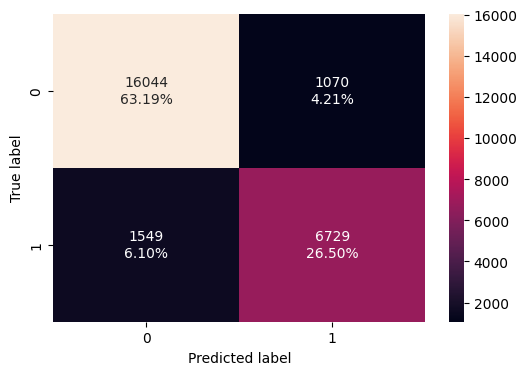

In [ ]:
confusion_matrix_sklearn(estimator, X_Train, Y_Train)

In [ ]:
decision_tree_performance_train_pruned = model_performance_classification_sklearn(estimator, X_Train, Y_Train)
decision_tree_performance_train_pruned

Accuracy  Recall  Precision      F1
0   0.89686 0.81288    0.86280 0.83710

Observations:

- the F1 score has fallen to .837 after pruning, but this is likely due to pruning the tree

### Model performance on Test Data

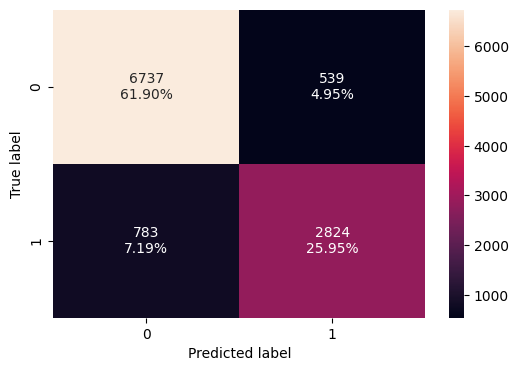

In [ ]:
confusion_matrix_sklearn(estimator, X_Test, Y_Test)

In [ ]:
decision_tree_performance_test_pruned = model_performance_classification_sklearn(estimator, X_Test, Y_Test)
decision_tree_performance_test_pruned

Accuracy  Recall  Precision      F1
0   0.87853 0.78292    0.83973 0.81033

Observations:

- the F1 score rose to .81
- the pruned model performed on the the train and test data approximately the same

### Visualizing the Pruned Tree

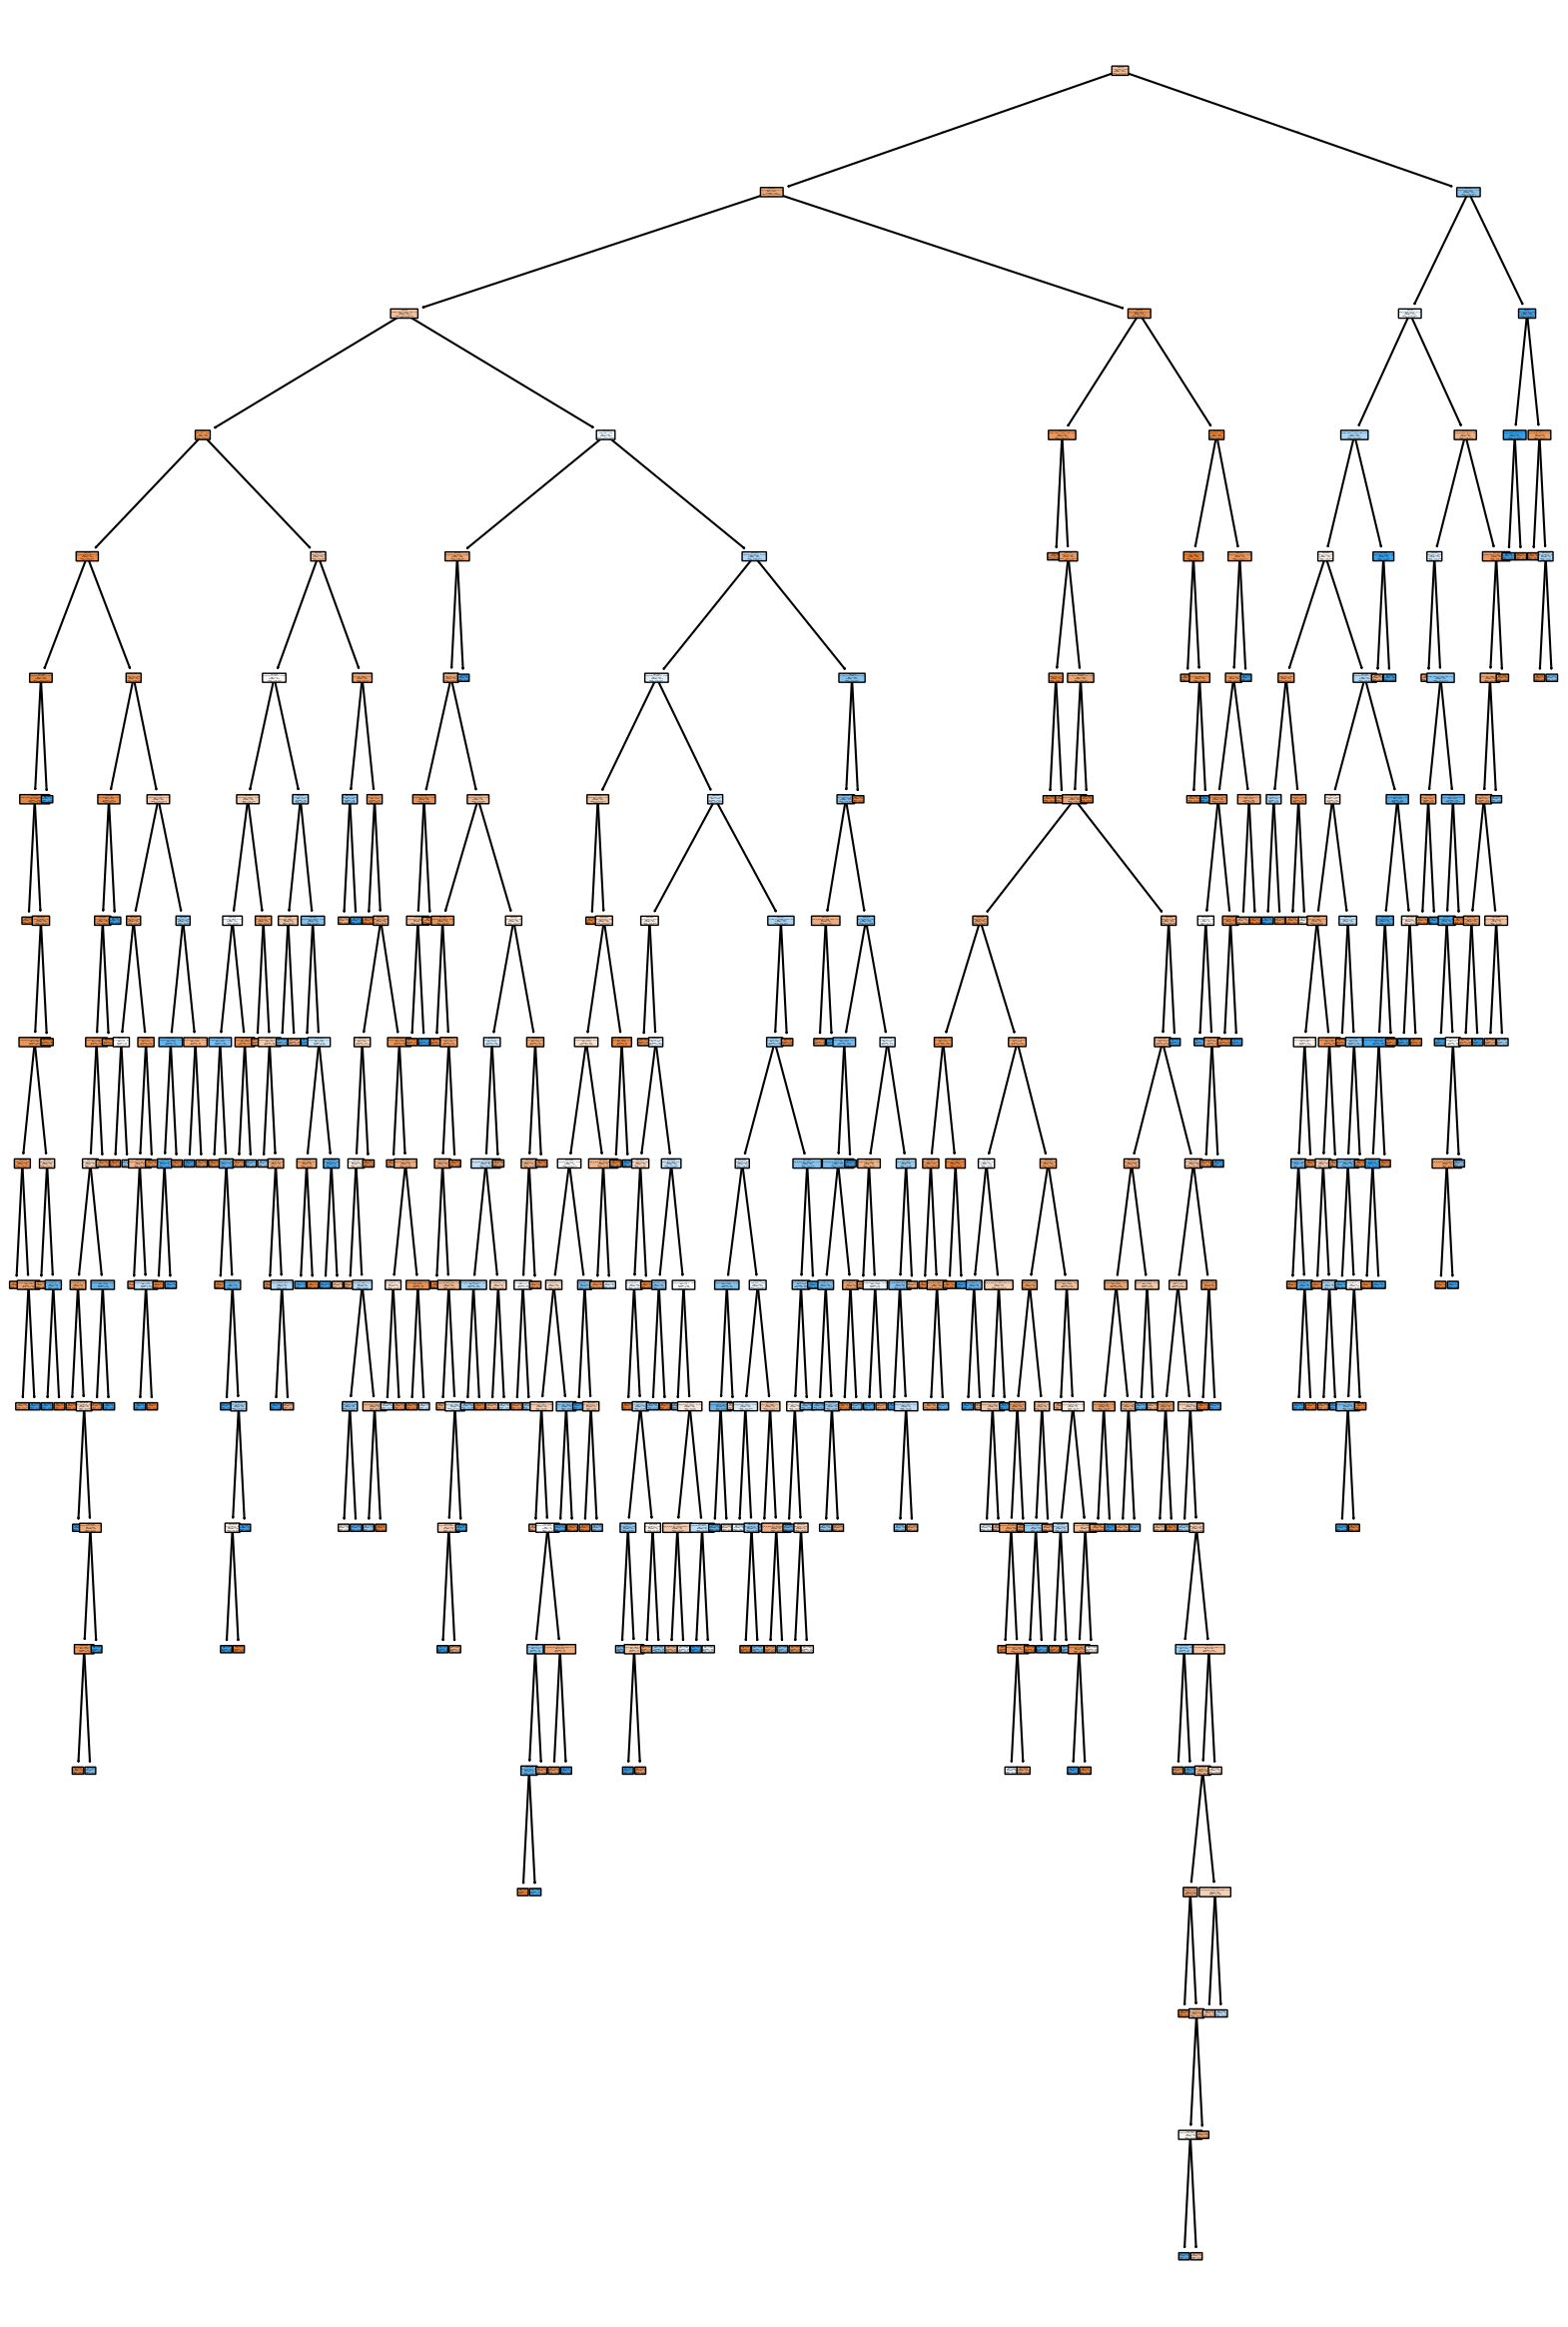

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    estimator,  # Use the best estimator found by GridSearch
    filled=True,
    rounded=True,
    feature_names=variable_names,
    class_names=['class1', 'class2'],  # Replace with actual class names
    node_ids=True
)

# Adjusting arrow styles for clarity
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1.5)

plt.show()

Observations:

- This tree is still quite large and complex, but much less so than the pre-pruned tree

### Cost complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=42)               # Initialize a Decision Tree Classifier with a random state for reproducibility
path = clf.cost_complexity_pruning_path(X_Train, Y_Train)   # Compute the pruning path using cost complexity pruning
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities   # Extract the array of effective alphas and impurities for pruning
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00761
1       -0.00000     0.00761
2        0.00000     0.00762
3        0.00000     0.00762
4        0.00000     0.00762
...          ...         ...
1349     0.00709     0.28665
1350     0.01207     0.29872
1351     0.01784     0.31655
1352     0.02397     0.36450
1353     0.07495     0.43945

[1354 rows x 2 columns]

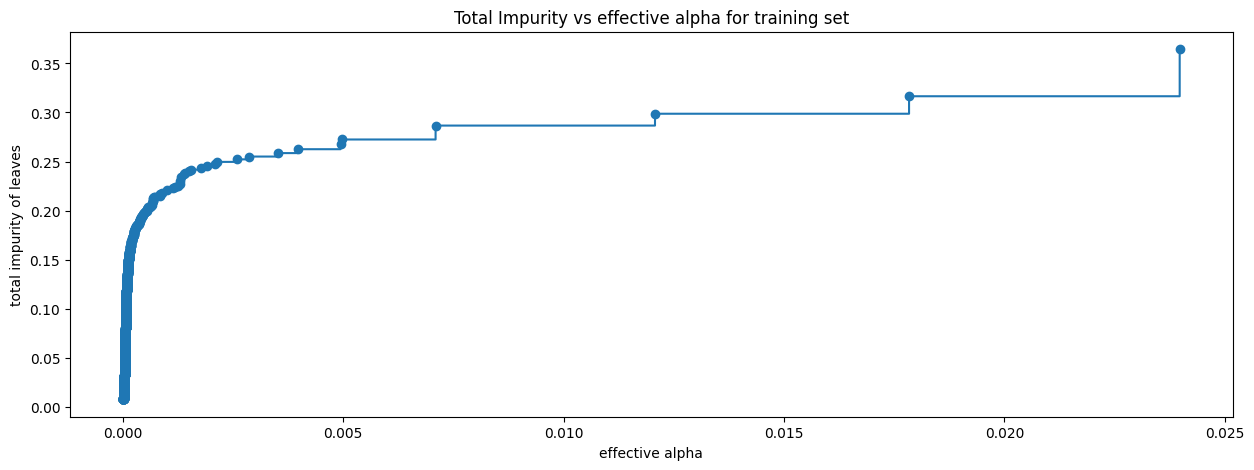

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We will now train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that will prune the tree, leaving it with one node for clfs[-1]

In [ ]:
# Initialize an empty list to store models with different ccp_alpha values
clfs = []

# Loop through each value of ccp_alpha to create pruned decision trees
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)  # Set ccp_alpha for pruning
    clf.fit(X_Train, Y_Train)  # Fit the model to the training data
    clfs.append(clf)  # Append the trained model to the list
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07495203066381129


Observations:

- at a ccp_alpha value of 0.0749 the decision tree is pruned down to 1 node

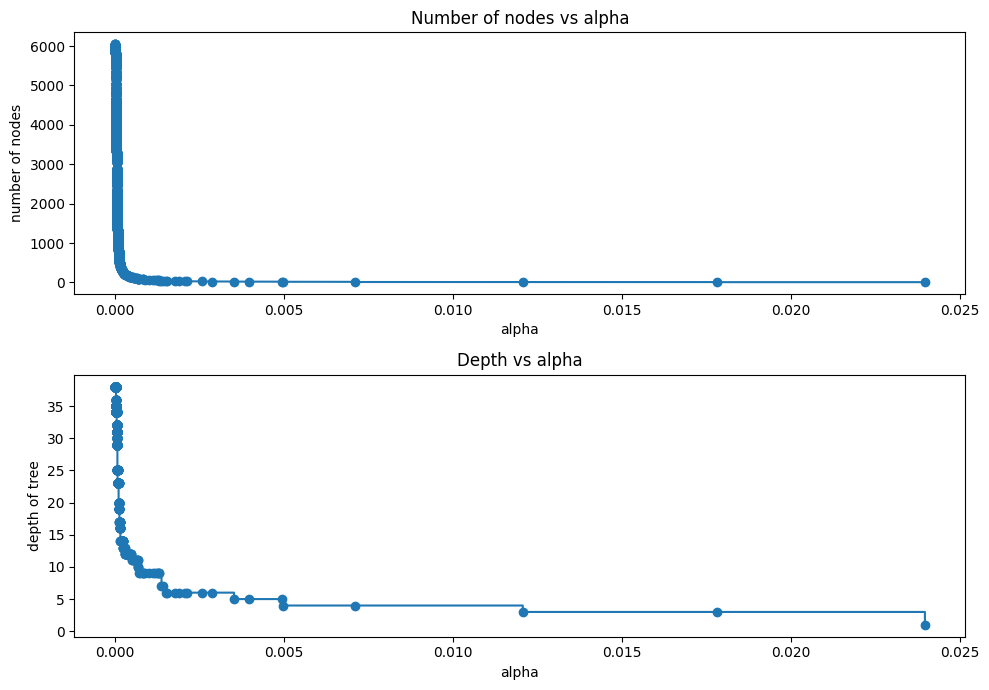

In [ ]:
# Remove the last entry from clfs and ccp_alphas to avoid using an invalid model
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Get the node count and depth for each decision tree in clfs
node_counts = [clf.tree_.node_count for clf in clfs]  # Number of nodes in each tree
depth = [clf.tree_.max_depth for clf in clfs]         # Depth of each tree

# Create a subplot with two rows to compare node count and tree depth against alpha
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Plot the depth of tree vs alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()


### F1 vs Alpha for training and testing sets

In [ ]:
# Initialize an empty list to store F1 scores for each model in clfs
F1_train = []

# Loop through each classifier in clfs
for clf in clfs:
    pred_train = clf.predict(X_Train)  # Make predictions on the training set
    values_train = f1_score(Y_Train, pred_train)  # Calculate F1 score for predictions
    F1_train.append(values_train)  # Append F1 score to the F1_train list


In [ ]:
# Initialize an empty list to store F1 scores for each model on the test set
F1_test = []

# Loop through each classifier in clfs
for clf in clfs:
    pred_test = clf.predict(X_Test)  # Make predictions on the test set
    values_test =f1_score(Y_Test, pred_test)  # Calculate F1 score for predictions
    F1_test.append(values_test)  # Append F1 score to the F1_test list

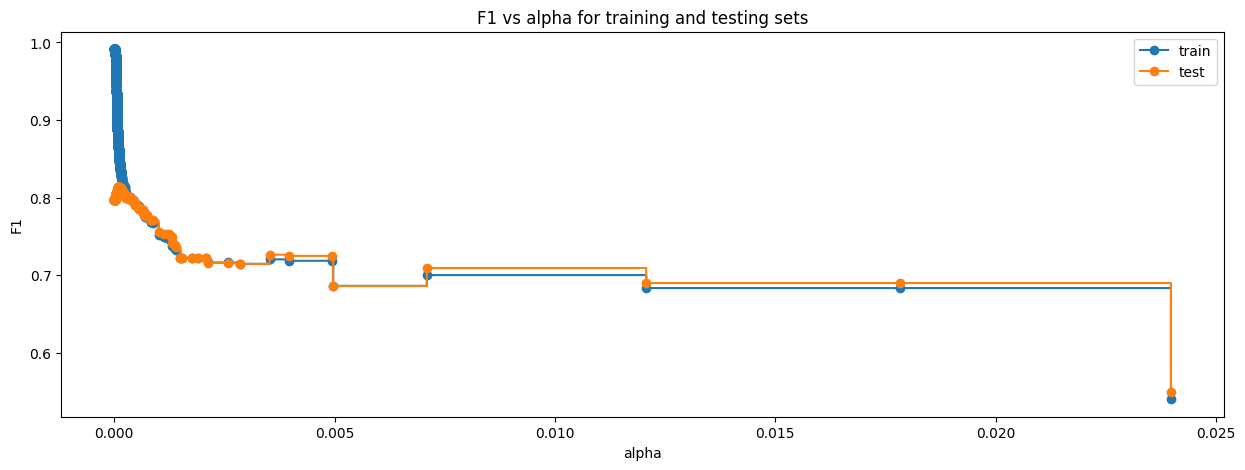

In [ ]:
# Create a figure and axis for plotting with specified figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Set x and y labels for alpha and F1, respectively
ax.set_xlabel("alpha")                                 # Label x-axis as alpha
ax.set_ylabel("F1")                                # Label y-axis as F1
ax.set_title("F1 vs alpha for training and testing sets")

# Plot F1 vs alpha for training set with markers and step style
ax.plot(ccp_alphas, F1_train, marker="o", label="train", drawstyle="steps-post")

# Plot F1 vs alpha for testing set with markers and step style
ax.plot(ccp_alphas, F1_test, marker="o", label="test", drawstyle="steps-post")

ax.legend()

plt.show()

In [ ]:
# creating the model where we get highest train and test f1
index_best_model = np.argmax(F1_test)
best_model = clfs[index_best_model]
best_model

DecisionTreeClassifier(ccp_alpha=0.00011322730587104229, random_state=42)

### Model performance on Train data

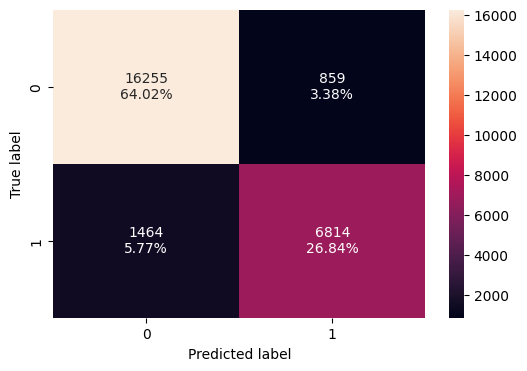

In [ ]:
confusion_matrix_sklearn(best_model, X_Train, Y_Train)

In [ ]:
decision_tree_postpruned_performance_train = model_performance_classification_sklearn(best_model, X_Train, Y_Train)
decision_tree_postpruned_performance_train

Accuracy  Recall  Precision      F1
0   0.90851 0.82315    0.88805 0.85437

### Model performance on Test data

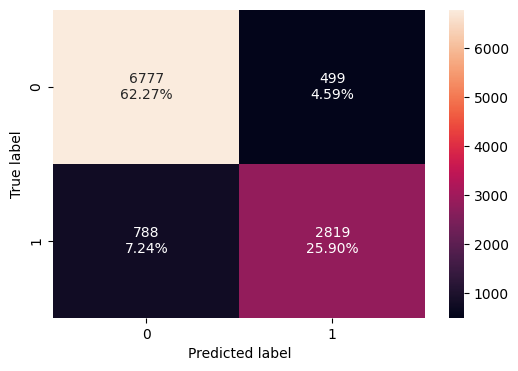

In [ ]:
confusion_matrix_sklearn(best_model, X_Test, Y_Test)

In [ ]:
decision_tree_postpruned_performance_test = model_performance_classification_sklearn(best_model, X_Test, Y_Test)
decision_tree_postpruned_performance_test

Accuracy  Recall  Precision      F1
0   0.88174 0.78154    0.84961 0.81415

Observations:

- the model performed a little better on the training data than it did on the test data
- besides the overfit model, these F1 scores are the highest for the training data, going up to .854 from the previous model
- this is the highest F1 score for test data, going slightly up from the last model to .814

### Visualising the Decision Tree

In [ ]:
plt.figure(figsize=(100, 100))

out = tree.plot_tree(
    best_model,
    feature_names=variable_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Text Tree

In [ ]:
print(tree.export_text(best_model, feature_names=variable_names))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 92.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  135.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|

### Variable Importance

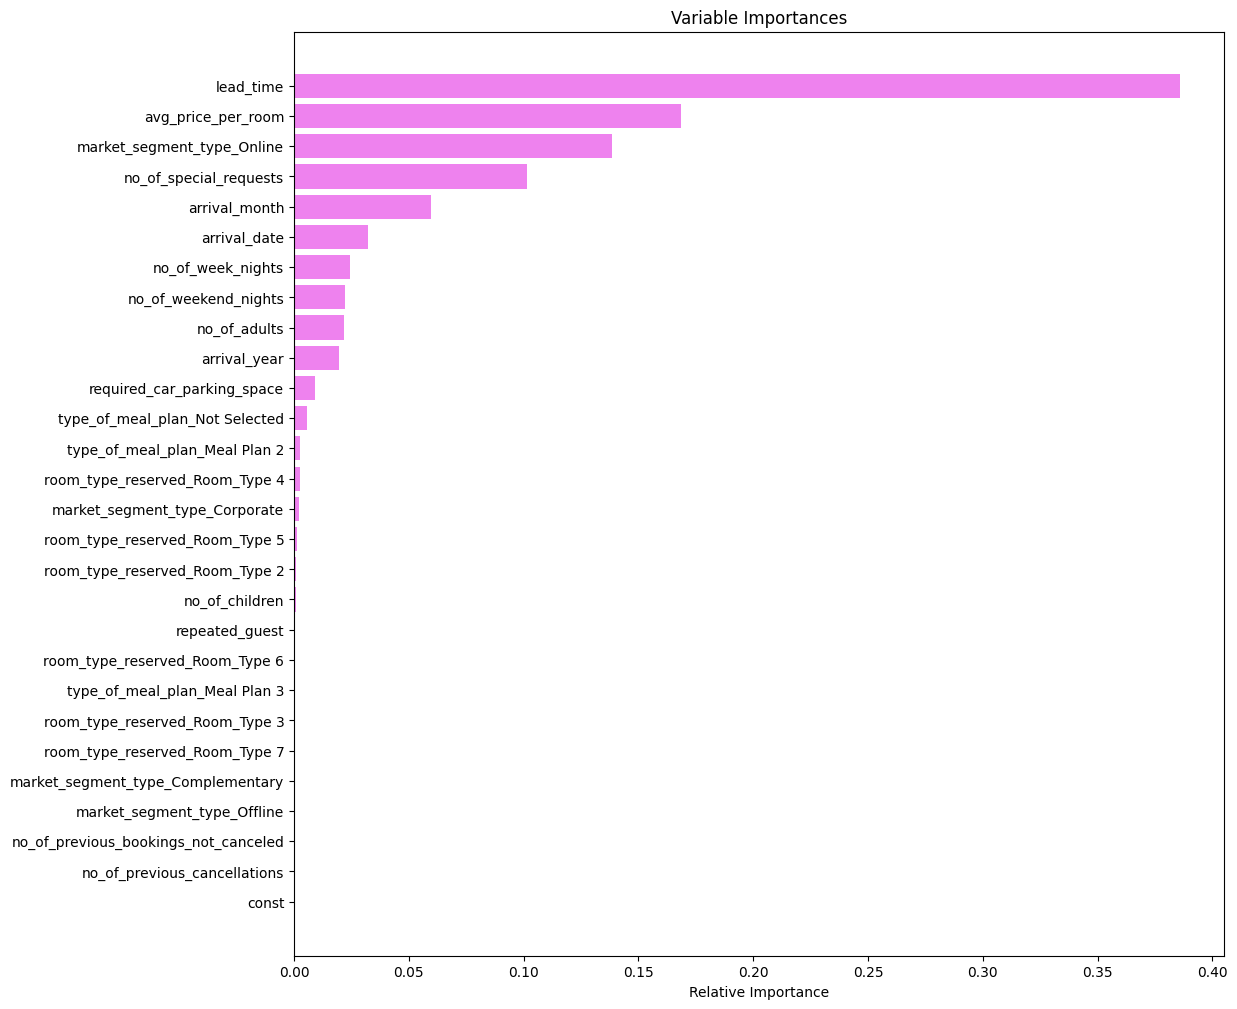

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Variable Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [variable_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

- the decision tree is still quite complex, but significantly less so than previous models, and it performs well on the test and train data

- the 5 most imporant variables in dertimining whether a customer is likely to cancel their booking or not are:
  - lead time
  - average price per room
  - whether the guest is from the online market segment
  - number of special requests the customer has
  - arrival month.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_performance_train.T,               # Performance metrics for the decision tree
        decision_tree_performance_train_pruned.T,        # Performance metrics for the pre-pruned decision tree
        decision_tree_postpruned_performance_train.T,    # Performance metrics for the post-pruned decision tree
    ],axis=1,)

#rename the columns to identify each model
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99429                      0.89686   
Recall                   0.98587                      0.81288   
Precision                0.99658                      0.86280   
F1                       0.99119                      0.83710   

           Decision Tree (Post-Pruning)  
Accuracy                        0.90851  
Recall                          0.82315  
Precision                       0.88805  
F1                              0.85437

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_performance_test.T,               # Performance metrics for the decision tree
        decision_tree_performance_test_pruned.T,        # Performance metrics for the pre-pruned decision tree
        decision_tree_postpruned_performance_test.T,    # Performance metrics for the post-pruned decision tree
    ],axis=1,)

#rename the columns to identify each model
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86373                      0.87853   
Recall                   0.80371                      0.78292   
Precision                0.78906                      0.83973   
F1                       0.79632                      0.81033   

           Decision Tree (Post-Pruning)  
Accuracy                        0.88174  
Recall                          0.78154  
Precision                       0.84961  
F1                              0.81415

Observations:

- the best decision tree model is the post-pruned model with an F1 score of
 0.854 on the training data and 0.814 on the test data
- these F1 scores are significantly higher than the logistic regression models, confirming the decision tree is the better model for this data

## Actionable Insights and Recommendations

**1. The F1 score should be used to minimize False Positives and False Negatives, as both are equally important to minimize for the hotel**

- Both cases are important as:

    - False Positive: if the hotel predicts a customer will cancel their booking when they will not, they may have booked their room to another guest, or they may not be able to provide the same service as if they had predicted they would not cancel. This hurts the hotel's brand.

    - False Negative: if they predict a customer will not cancel their booking when they will, the hotel will lose revenue on that booking, and potentialy other bookings they did not predict the rooms would be empty.

**2. The hotel should use the post pruned Decision Tree model shown above optimizing the F1 score for predictions**

- This model gave the highest F1 score, which we have decided to optimize, and gave balanced performance on the train and test set.

**3. Lead time is the most important factor and should be analyzed further**

-  The first node in the decision tree splits on Lead time, signifying its importance.
- Lead time of about 150+ days increases the chance of booking cancellation, and more bookings are canceled after this mark than are not.
  - The hotel could analyze the data further pre and post 150 days of lead time to search for patterns.
- Despite making up for the smallest percentage of cancellations, the greatest number of cancellations occur within 30 days of lead time.
  - The hotel could tackle this issue by only offering hotel stay credits as opposed to refunds within 30 days of cancellation, and only partial refunds within 15 days or less, depending on the competitive environment of other hotel offerings and cancellation policies.
  - The hotel could also offer services to move a guest's stay to different dates if they cancel due to travel plans needing to change. This will preserve revenue and customer relationships.

**4. The hotel would benefit from better defining some data, and gathering new data**
- Clarifying 0 night stay guests would help determine if there are additional variables that can help improve the current model.
  - 0 night stay guests could be marked such for a number of different factors:
    - Early check ins or check outs
    - Incomplete bookings
    - Data entry error
    - Duplicate cancellations
    - No shows
    - Day use bookings
    - A combination of the above or additional variables

  However none of these options are clearly describe zero night stay values.
    
- Having data that identifies "no shows" may also help improve the model
- Having data for the number of rooms booked on a booking could help provide additional insights.
- Having data on the total cost to the customer for a booking may provide additional insights.
- Having a field for "why are you canceling your booking" on online bookings may help provide additional insights for predictive modeling and service improvement.